# Eco-Illusion: The Fallacy of Environmental Laws as a Solution to GHG Pollution
## Do Environmental Laws have a direct effect on GHG emissions?

#### MGT-499 Statistics and Data Science - Group Assignment
#### Team Elephants: Claas Klatte, Maria Velikikh, Emilija Vukasinovic

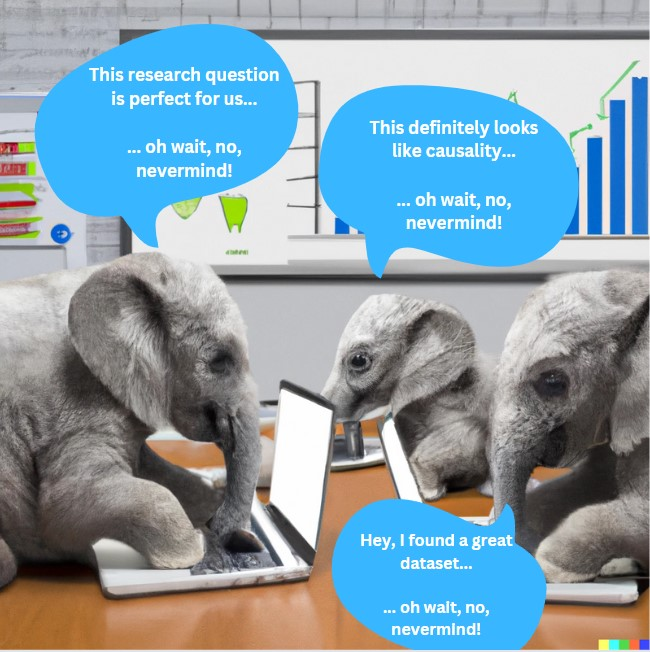

*The image was creeated by [DALL-E](https://labs.openai.com) with the prompt "Three baby elephants with laptops trying to work on their data science assignment"*

*The text was created by us.*

# Content <a class="anchor" id="content"></a>

- [1. Introduction](#introduction)
  - [1.1 Problem Statement and Research Question](#problem_statement)
  - [1.2 Databases and Variable Selection](#databases)
- [2. Data Exploration](#data_exploration)
  - [2.1 Descriptive Analsyis](#descriptive_analysis)
  - [2.2 Data Visualization](#data_visualization)
- [3. Causality Analysis](#causality_analysis)
  - [3.1. Simple Regression Model](#simplereg)
  - [3.2. Multiple Regression Model](#controlreg)
  - [3.3. Reverse Causality](#reverse_causality)
  - [3.4. Diff-in-Diff](#diffindiff)
- [4. Discussion](#discussion)
   - [4.1. Limitations and Assumptions](#limitations)
   - [4.2. Outlook](#outlook)
- [5. Conclusion](#summary)
- [Appendix](#appendix)
   - [A1. Import](#appendix1)
   - [A2. Data Exploration](#appendix2)
   - [A3. Causal Analysis](#appendix3)

## 1 Introduction <a class="anchor" id="introduction"></a>

### <span style="color:red">**Attention:**</span>
#### <span style="color:red"> For this notebook to run smoothly and the code to work properly, before reading this article, please go to the beginning of the Appendix [here](#appendix1) and execute ALL COMMANDS IN APPENDIX 1: IMPORT. Afterwards, return back here and enjoy this analysis!</span>

### 1.1 Problem Statement and Research Question <a class="anchor" id="problem_statement"></a>

**Rising global greenhouse gas (GHG) emissions and inadequate climate action**

The [latest IPCC report AR6](https://www.ipcc.ch/report/sixth-assessment-report-working-group-i/) underlines that "human influence has warmed the climate at a rate that is unprecedented in at least the last 2000 years." The key driver of this warming are rising GHG emissions that are undoubdetly mainly due to human activities, and which strongly accelerated with the beginning of industrialization in the 1750s. Despite actions toward tackling climate change, GHG concentracions have even continued to rise globally as [Our World in Data](https://ourworldindata.org/greenhouse-gas-emissions) shows.

In line with this, the last [Emissions Gap Report 2022](https://www.unep.org/resources/emissions-gap-report-2022) urges countries to accelerate climate action, as there has been inadequate action and limited progress on the way to reducing emissions toward 2030, and working toward the targets of the Paris Agreement. 

**Estimating the Effect of Environmental Laws on Global GHG emissions**

This climate action is, amongst other things, reflected in national or global environmental laws and policies. Environmental laws can influence GHG emissions in several ways. Firstly, they can directly set limits on the amount of GHGs that can be emitted by certain industries or sectors. Secondly, environmental laws can also influence GHG emissions indirectly by encouraging the use of cleaner and more efficient technologies and practices. Lastly, they can also influence emissions by shaping consumer behavior. Worldwide, there are currently 2,973 climate policies and laws in place and the number is increasing (https://climate-laws.org/). 

There has been some research on the influence of environmental legislation on GHG emissions. Eskander and Fankhauser (2020), for example, found that each new law reduces annual CO2e emissions per unit of GDP by 0.78% in the short-term (<3 years) and 1.79% in the long-term (>3 years). Moreover, Muhammad and Long (2021) studied the effects of institutional quality on CO2 emissions concluding that institutional factors are highly important for lowering carbon emissions and improving environmental quality. However, more extensive studies are still missing.
Therefore, the question remains how much climate legislation has really contributed to reducing GHG emissions and tacking climate change, especially as GHG emissions are rising globally.

Given this context, **we aim to statistically estimate the effect of environmental laws and policies on global GHG emissions**. Presumably environmental laws and policies have had some effect on global GHG emissions, and therefore we would like to quantify if and by how much.

**Methodology**

To solve our reseach question, we aim to follow the following steps:
- *Data Exploration*: Cleaning the datasets and gaining first insights into the data through descriptive statistics and visualization.
- *Causality Analysis*: Exploring the effect of environmental laws on GHG emissions through various econometric methods including simple and multiple regression models, a test for reverse causality, and a differences-in-differences test.
- *Discussion and Limitations*: Discussing our results as well as underlying assumptions and limitations of the methods and results.
- *Conclusion*: Presenting the main take-aways.

*The above-mentioned articles can be found here: Eskander and Fankhauser (2020): https://www.nature.com/articles/s41558-020-0831-z; Muhammad and Long (2021) (https://www.sciencedirect.com/science/article/pii/S0959652620335848?casa_token=IjNtFB6KIasAAAAA:PLgVaSe0x9YJOdnQwI9UNgLdi36FVjv2gC5XfjOxZnWnvKfSN-oNaev0-rSKuLBYRqTNZz1kYa8)*

### 1.2 Databases and Variable Selection <a class="anchor" id="databases"></a>

For our research we use three databases, the (1) Environmental Indicators Dataset (Quality of Government), the (2) Expanded Trade and GDP Dataset (Quality of Government), and (3) the Polity 5 Dataset.

**Environmental Indicators Dataset**

[The Quality of Government Environmental Indicators Dataset (QoG-EI)](https://www.gu.se/en/quality-government/qog-data/data-downloads/environmental-indicators-dataset) includes openly available indicators measuring environmental performance of countries over time. These are indicators such as the presence and strictness of environmental policies, the level of pressure on the environment (ecological footprint and emission levels), and public opinion on the environmental matters. Moreover, the dataset also includes background geographical data such as the annual average rainfall and the size of land area, among others. 

(Codebook is available [here](https://www.qogdata.pol.gu.se/data/codebook_ei_sept21.pdf), Dataset is available [here](https://www.qogdata.pol.gu.se/data/qog_ei_sept21.csv))

*Povitkina, Marina, Natalia Alvarado Pachon & Cem Mert Dalli. 2021. The Quality of Government Environmental Indicators Dataset, version Sep21. University of Gothenburg: The Quality of Government Institute, https://www.gu.se/en/quality-government*

**Expanded Trade and GDP Dataset**

This dataset is an expansion of the previous dataset and, hence, can also be found as part of the Quality of Government Standard Dataset.

(Codebook is available [here](https://www.qogdata.pol.gu.se/data/codebook_std_jan22.pdf), Dataset is available [here](https://datafinder.qog.gu.se/variable/gle_cgdpc))

**Polity5: Regime Authority Characteristics and Transitions Datasets**

The [Polity5](http://www.systemicpeace.org/inscrdata.html) is a dataset with annual, cross-national, time-series and polity-case formats coding democratic and autocratic "patterns of authority" and regime changes in all independent countries with total population greater than 500,000 in 2018 (167 countries in 2018); data for years 1800 - 1945 are Polity IV values.

(Codebook is available [here](http://www.systemicpeace.org/inscr/p5manualv2018.pdf))

For our research, we specifically use the X, Y, and Z indicators from this dataset, as they cover XXX. 

**We use a combined and cleaned version of the initial dataset, which combines these two datasets. The dataset we use was created by Eduardo Chiarotti and can be found [here](https://github.com/edoardochiarotti/class_datascience/tree/main/Notebooks/Assignment/individual_assignment/clean_data_prepared_EDA). We simply added the expanded GDP Dataset to this.**

#### **Variable Selection**

From the QOG Environmental Indicators Dataset we will work with the following indicators that we will use as *explanatory variables*: 
- **Climate change mitigation law or policy in place (`ccl_mitlpp`)**: Number of laws or policies related to climate change mitigation adopted *per year*. 
- **Number of climate change mitigation laws and policies (`ccl_nmitlp`)**: *Cumulative sum* of laws and policies related to climate change mitigation.
- **Anual average temperature (`cckp_temp`)**: average annual temperature in Celsius.
- **GDP per Capita (`gle_cgdpc`)**: current prices

*Note:* Mitigation laws and policies focused on curbing a country's greenhouse gases emissions. Measures can be directly related to emissions reductions, such as laws establishing a national carbon budget or cap and trade system, or indirectly related, such as laws or policies establishing relevant institutions or providing additional funding for research and development into low carbon technologies. Laws and policies addressing forests and land use are included as long as they explicitly support climate change mitigation through activities that reduce emissions and increase carbon removals.

From this dataset we will also use another variable as our *outcome variable*:
- **GHG emissions per capita (`epi_ghp`)**: Environmental Performance Index calculates greenhouse gas (GHG) emissions per capita for each country in the year 2017. The variable is log-transformed. The unit of measurement is gigagrams (Gg) of CO2-equivalent per person.


*Note:*  *Original source: Potsdam Institute for Climate Impact Research. Wendling, Z.A. et al. 2020. "2020 Environmental Performance Index". New Haven, CT: Yale Center for Environmental Law and Policy. URL: https://epi.envirocenter.yale.edu/* 

## 2 Data Exploration <a class="anchor" id="data_exploration"></a>

The data exploration part aims to explore our "raw" data, as well as to merge and prepare the databases to used them for our further analysis.
A more in depth code and explanation can be found in the Appendix ([here](#appendix2)).

### 2.1 Descriptive Analysis <a class="anchor" id="#discriptive_analisys"></a>

In [58]:
df.describe()

index         year       ghg_pc  laws_total      laws_py  \
count  1720.000000  1720.000000  1720.000000  1720.00000  1720.000000   
mean   4773.043605  2004.629070    49.859730     2.47093     0.366860   
std    2731.098645     4.547042    29.968512     2.30947     0.676847   
min     115.000000  1995.000000     0.000000     0.00000     0.000000   
25%    2333.750000  2001.000000    24.311765     1.00000     0.000000   
50%    4656.500000  2005.000000    47.579660     2.00000     0.000000   
75%    7058.250000  2009.000000    76.961342     3.00000     1.000000   
max    9382.000000  2011.000000   100.000000    16.00000     5.000000   

           polity2  average_temp_py         gdp_pc  ETS_membership  \
count  1720.000000      1720.000000    1720.000000          1720.0   
mean      4.151163        17.729797   11845.304262             1.0   
std       6.339287         8.586588   14377.299878             0.0   
min     -10.000000        -7.433333     173.110000             1.0   
25%      -2.000000        10.218750    2111.960000             1.0   
50%       7.000000        20.887500    5329.635000             1.0   
75%      10.000000        25.208333   18212.707500             1.0   
max      10.000000        29.366667  112560.180000             1.0   

       ETS_members  
count  1720.000000  
mean      0.175581  
std       0.380574  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

The table shows summary statistics our seven chosen variables for our dataset which contains 1720 observations.The variables are:
- index: a numeric identifier for each observation
- year: the year of the observation
- ghg_pc: a measure of greenhouse gas emissions per capita
- laws_total: the total number of laws related to climate change
- laws_py: the number of laws related to climate change per year
- polity2: a measure of political stability and democracy
- average_temp_py: the average temperature in the year of the observation
- gdp_pc: gross domestic product per capita


The mean and standard deviation (std) of each variable are also shown, along with the minimum (min), first quartile (25%), median (50%), third quartile (75%), and maximum (max) value. The summary statistics indicate that, on average, the year of the observation is 2004, greenhouse gas emissions per capita are 49.8 units, there are 2.5 laws related to climate change per year, the polity2 score is 0.4, the average temperature is 4.2 degrees, and GDP per capita is 11845 units.

### 2.2 Data Visualization <a class="anchor" id="#data_visualization"></a>

**Global Distribution of Climate Change Mitigation Laws and Policies**

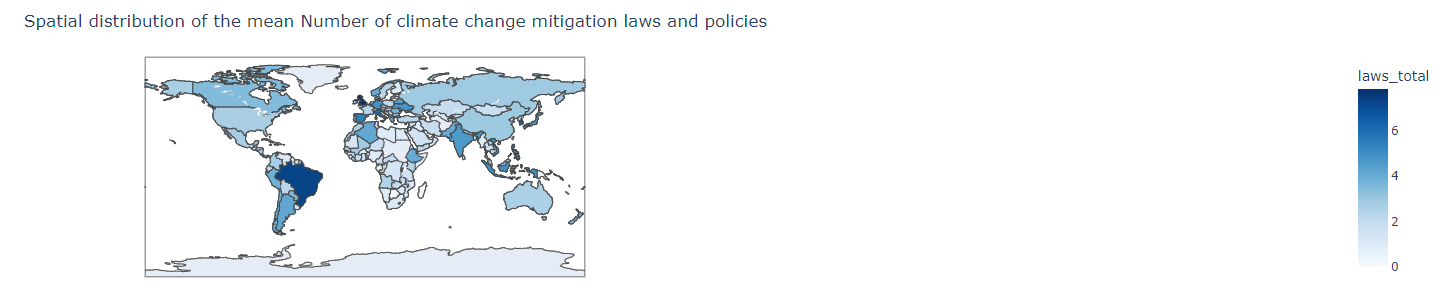

This map shows the spatial distribution of the mean number of climate change mitigation laws and policies. As seen from the descriptive statistics table, the number of laws range from 0 to 16 laws. The more laws a country has, the darker the shade of blue on this map.

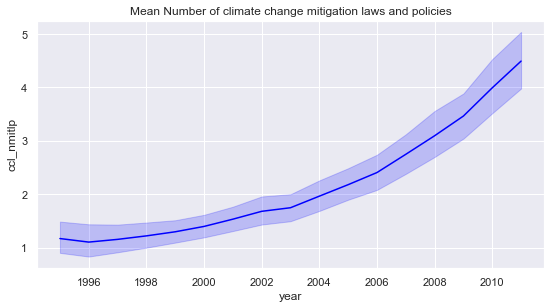

Here we can see a line trend of the mean number of climate change mitigation laws and policies for the years we included in our dataset (1995-2012). We can see that the mean number of laws has been increaseing since 1995 until 2012. The band around the trend line, represents the confidence interval, the uncertainty in the estimate of the trend line. It is a range of values that is likely to include the true trend line with a certain level of confidence.

**Global GHG Emissions**

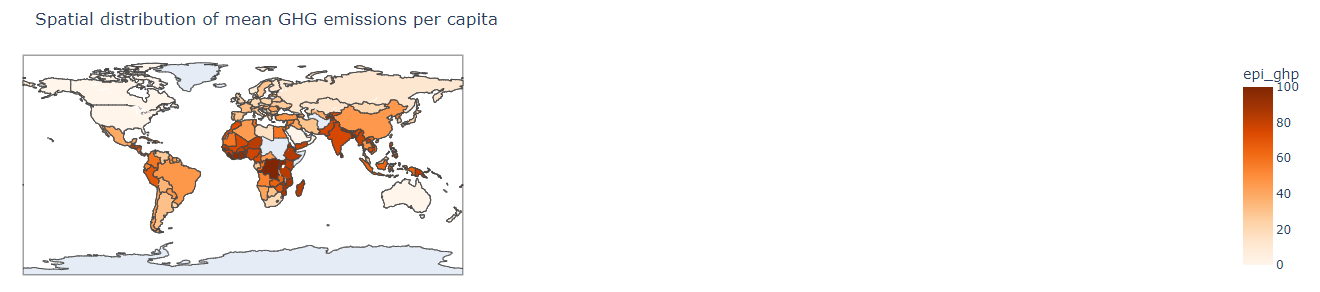

This map shows the global distribution of mean GHG emissions per capita. The values range on a scale from 0 to 100. Countries with a score of 0 are relative to other countries the most polluting ones. On the contrary, countries with a score of 100 are relatively to other countries, the least polluting ones. The scores are shaded from a whitish orange (score 0) to a dark red (score 100).

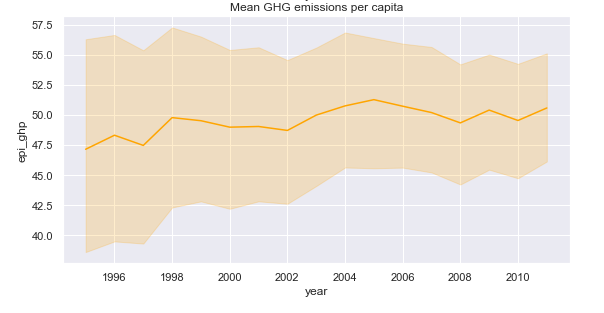

With this line trend we can see that the GHG emissions have on average been rising between 1995 and 2012. Again the shaded area represents the confidence interval. Here we can see that there is a great variation of where the true line could be.

**Note**: More interesting visualizations in the form of maps, line trends, scatter plots, etc. can be found in the appendix.

## 3 Causality Analysis <a class="anchor" id="causality_analysis"></a>

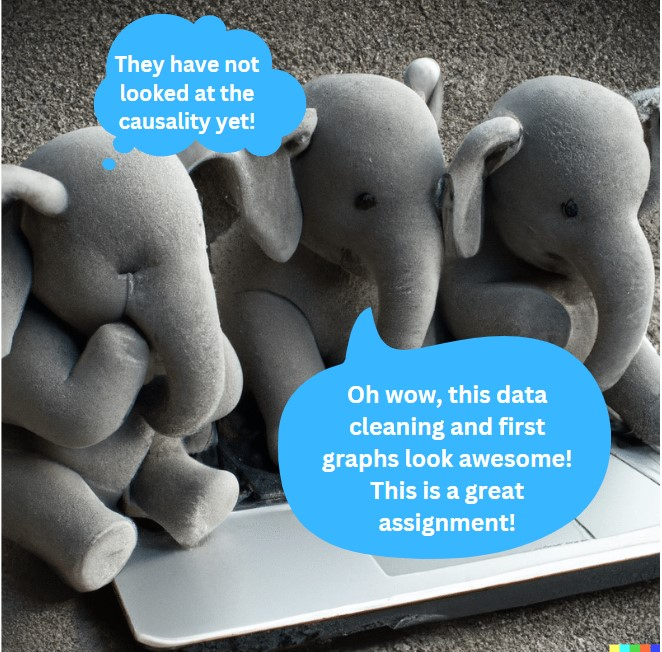

### Scatterplots

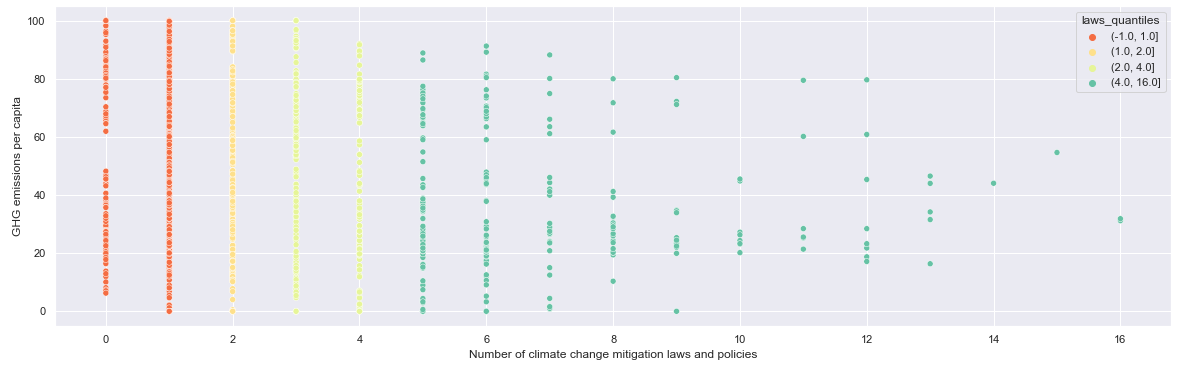

Scatterplots are useful tools for visualizing the relationship between variables. A scatterolot can give indications about the direction of the relationship (positive or negative), the strength of the relationship, show the presence of outliers, and show overall trends and patterns. This scatterplot here, is a graphical representation of the relationship between the number of laws and GHG emissions per capita with the different colors representing the quantiles of laws. As our explanatory variable (laws) is discrete and the outcome variable (GHG emissions) is continuous, we see only vertical lines in this scatterplot. Consequently, only by looking at this visualization it is not possible to already say something about the direction of the relationship, or see any strong trends. In the next steps we will perform different methods of causality analysis and linear regression to find out more about this relationship.


For the causality analysis, we will use the following linear regression model:
\begin{equation}Y_i = \beta_0 + \beta_1 X_i + \epsilon_i\end{equation}

- $Y_i$ is the dependent variable for the $i$th observation
- $X_i$ is the independent variable for the $i$th observation
- $\beta_0$ is the intercept term
- $\beta_1$ is the coefficient for the independent variable
- $\epsilon_i$ is the error term for the $i$th observation

### 3.1 Simple Regression Model <a class="anchor" id="simplereg"></a>

For the simple regression, we will only include one explanatory variable which is the number of laws. The following equation is used to model the relationship:

 \begin{equation}GHGpc = \beta_0 + \beta_1 Laws + \epsilon_i\end{equation}

In [59]:
# simple regression model
df_simple = PanelOLS.from_formula("ghg_pc ~ laws_total",
                            data=df.set_index(["country", "year"]))

reg1 = df_simple.fit(cov_type='clustered', cluster_entity=True)
reg1

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                 ghg_pc   R-squared:                        0.2967
Estimator:                   PanelOLS   R-squared (Between):              0.3878
No. Observations:                1720   R-squared (Within):              -34.917
Date:                Fri, Oct 06 2023   R-squared (Overall):              0.2967
Time:                        17:33:37   Log-likelihood                   -9126.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      725.07
Entities:                         152   P-value                           0.0000
Avg Obs:                       11.316   Distribution:                  F(1,1719)
Min Obs:                       1.0000                                           
Max Obs:                       17.000   F-statistic (robust):             98.486
                                        P-value                           0.0000
Time periods:                      17   Distribution:                  F(1,1719)
Avg Obs:                       101.18                                           
Min Obs:                       41.000                                           
Max Obs:                       151.00                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
laws_total     9.3688     0.9441     9.9240     0.0000      7.5172      11.220
==============================================================================


PanelEffectsResults, id: 0x290f9d400

**Interpretation**:
- The estimate of environmental laws is positive suggesting that an increase in laws would lead to an increase in GHG emissions.
- The p-value is 0.0000 indicating that the effect of environmental laws on GHG emissions is statistically highly significant ($\alpha$ < 1%).
- The r-squared of 0.2967 suggests that only around 30% of the variance in GHG emissions is explained by the model. This suggests that the model is not a very good fit, and that other factors may be influencing the relationship between the variables.

### 3.2 Multiple Regression Model <a class="anchor" id="controlreg"></a>

For the multiple regression, we will include fixed effects and more explanatory variables (control variables).

#### **Regression Model with Fixed Effects**

Rationale:
- Including fixed effects in a model allows for a more accurate estimate of the effect of environmental laws on GHG emissions, as it controls for other factors that may influence GHG emissions.
- *Country fixed effects* control for differences between countries that may affect GHG emissions, such as differences in economic development, technological capabilities, and cultural values. For example, a country with a more advanced economy and more developed technology may have higher GHG emissions, regardless of its environmental laws. By controlling for country, fixed effects models can estimate the effect of environmental laws within each country, rather than being influenced by differences between countries.
- *Time fixed effects* control for changes in factors over time that may affect GHG emissions. For example, changes in economic conditions or technological advances may affect GHG emissions, regardless of environmental laws. By controlling for time, fixed effects models can estimate the effect of environmental laws within each time period, rather than being influenced by changes over time.

The following euqation is used for the regression model with fixed effects:

\begin{equation}Y_i = \beta_0 + \beta_1 X_i + \alpha_j + \gamma_k + \epsilon_i\end{equation}

- $Y_i$ is the dependent variable for the $i$th observation
- $X_i$ is the independent variable for the $i$th observation
- $\beta_0$ is the intercept term
- $\beta_1$ is the coefficient for the independent variable
- $\alpha_j$ is the country fixed effect for the $j$th country
- $\gamma_k$ is the time fixed effect for the $k$th time period
- $\epsilon_i$ is the error term for the $i$th observation

With our variables this translates to:

 \begin{equation}GHGpc = \beta_0 + \beta_1 Laws + FE_c + FE_t + \epsilon_i\end{equation}

In [60]:
# multiple regression model - fixed effects
df_fe = PanelOLS.from_formula("ghg_pc ~ laws_total + EntityEffects",
                            data=df.set_index(["country", "year"]))

reg2 = df_fe.fit(cov_type='clustered', cluster_entity=True)
reg2

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                 ghg_pc   R-squared:                        0.0195
Estimator:                   PanelOLS   R-squared (Between):             -0.0140
No. Observations:                1720   R-squared (Within):               0.0195
Date:                Fri, Oct 06 2023   R-squared (Overall):             -0.0145
Time:                        17:33:40   Log-likelihood                   -4225.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      31.234
Entities:                         152   P-value                           0.0000
Avg Obs:                       11.316   Distribution:                  F(1,1567)
Min Obs:                       1.0000                                           
Max Obs:                       17.000   F-statistic (robust):             3.5694
                                        P-value                           0.0590
Time periods:                      17   Distribution:                  F(1,1567)
Avg Obs:                       101.18                                           
Min Obs:                       41.000                                           
Max Obs:                       151.00                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
laws_total    -0.2270     0.1201    -1.8893     0.0590     -0.4626      0.0087
==============================================================================

F-test for Poolability: 1096.0
P-value: 0.0000
Distribution: F(151,1567)

Included effects: Entity
PanelEffectsResults, id: 0x29302c250

**Interpretation**:
- The coefficient for the laws_total variable is -0.2270, which is statistically not significant ($\alpha$ > 5%) suggesting that there might be no relationship between environmental laws and GHG emissions.
- The confidence intervals for the coefficient indicate that there is a 95% probability that the true coefficient falls within the range of -0.4626 to 0.0087. This suggests that the estimate of the coefficient is relatively precise.
- The r-squared is 0.0195 and very small, which means that only 1.95% of the variance in GHG emissions is explained by the model. The model does not explain a large portion of the variance in the dependent variable.
- The f-statistic (measure of the overall significance of the model) is 31.234, which suggests that the model is significantly better than the mean model. However, the p-value for the F-statistic is 0.0590, which indicates that the model is only marginally significant.

#### **Regression Model with Control Variables**

Adding additional regressors in the form of control variables to the model...
- ... can help us enhance the prognose quality of our model.
- ... is important as we do not have a randomized controlled trial to make sure that our $X_1$ is uncorrelated with the error term, therefore we do a multiple regression to include all other potential influence on $Y_i$. Here we assume that the residual error term (which we cannot be observed), that after controlling for $X_2$, $X_3$, etc. does not correlate with $X_1$ anymore. Ff they are correlated then our regression does not show the causal effect and we have ommited variable bias.
- ... changes the interpretation of $\beta_1$ (effect of $X_1$ on y is not the same in a simple regression and a (ceteris-paribus) multiple regression (only same if $X_2$, $X_3$, etc. and $X_1$ are uncorrelated or if $X_2$, $X_3$, etc. = 0)
- ... decreases the Mean Sqaured Error (MSE)

Choice of control variables:
- *GDP per capita* can be an important factor in determining GHG emissions. For example, higher levels of GDP per capita may be associated with higher levels of GHG emissions due to increased consumption and industrial activity.

- *Polity2* is a measure of the level of democracy in a country and can be an important factor in determining GHG emissions. Countries with higher levels of democracy may be more likely to implement stricter environmental laws, which could lead to lower GHG emissions. 

- *Temperature* can be an important factor in determining GHG emissions, as higher temperatures may be associated with higher levels of energy consumption for air conditioning and other uses. 


The following equation is used for the regression model with control variables:

\begin{equation}Y_i = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \epsilon_i\end{equation}

- $Y_i$ is the dependent variable for the $i$th observation
- $X_1$, $X_2$, $X_3$, and $X_4$ are the independent variables for the $i$th observation
- $\beta_0$ is the intercept term
- $\beta_1$, $\beta_2$, $\beta_3$, and $\beta_4$ are the coefficients for the independent variables
- $\alpha_j$ is the country fixed effect for the $j$th country
- $\gamma_k$ is the time fixed effect for the $k$th time period
- $\epsilon_i$ is the error term for the $i$th observation

With our variables this translates to:

 \begin{equation}GHGpc = \beta_0 + \beta_1 Laws + \beta_2 GDPpc + \beta_3 Polity + \beta_4 TEMPaverage + FE_c + FE_t + \epsilon_i\end{equation}


In [61]:
# multiple regression model - control variables
df_control = PanelOLS.from_formula("ghg_pc ~ laws_total + gdp_pc + polity2 + average_temp_py + EntityEffects",
                            data=df.set_index(["country", "year"]))

reg3 = df_control.fit(cov_type='clustered', cluster_entity=True)
reg3

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                 ghg_pc   R-squared:                        0.0210
Estimator:                   PanelOLS   R-squared (Between):              0.0743
No. Observations:                1720   R-squared (Within):               0.0210
Date:                Fri, Oct 06 2023   R-squared (Overall):              0.0729
Time:                        17:33:43   Log-likelihood                   -4223.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.3849
Entities:                         152   P-value                           0.0000
Avg Obs:                       11.316   Distribution:                  F(4,1564)
Min Obs:                       1.0000                                           
Max Obs:                       17.000   F-statistic (robust):             1.5276
                                        P-value                           0.1916
Time periods:                      17   Distribution:                  F(4,1564)
Avg Obs:                       101.18                                           
Min Obs:                       41.000                                           
Max Obs:                       151.00                                           
                                                                                
                                Parameter Estimates                                
===================================================================================
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
laws_total         -0.2600     0.1173    -2.2174     0.0267     -0.4900     -0.0300
gdp_pc           2.407e-05  5.743e-05     0.4191     0.6752  -8.857e-05      0.0001
polity2             0.0379     0.0984     0.3851     0.7002     -0.1551      0.2309
average_temp_py     0.1389     0.2058     0.6747     0.5000     -0.2649      0.5427
===================================================================================

F-test for Poolability: 466.45
P-value: 0.0000
Distribution: F(151,1564)

Included effects: Entity
PanelEffectsResults, id: 0x293046bb0

**Interpretation**:
Based on the parameter estimates, the following conclusions can be drawn about the effect of the explanatory variables on GHG emissions:
- The coefficients of all control variables are not significant ($\alpha$ > 5%).
- The coefficient of environmental laws -0.2600 indicating a negative relationship and meaning that with increasing laws GHG emissions would decrease.
- The p-value is 0.0267 and statistically significant ($\alpha$ < 5%) suggests that there is a statistically significant negative relationship between laws_total and GHG emissions.
- The r-squared is 0.0210, which means that only 2.10% of the variance in GHG emissions is explained by the model. The model only explains a very small portion of the variance in the dependent variable. ANother model might explain the variance better (e.g., one with more control variables).
- The f-statistic is 8.3849, which suggests that the model is a good fit for the data.
- The f-statistic and p-value indicate that the effect of laws on GHG emissions is statistically significant and that the model is a good fit for the data.

**Comparison of the three models**

In [62]:
models = ['Model 1', 'Model 2', 'Model 3']
coefficient_estimates = [9.3688, -0.2270, -0.2600]
t_statistics = [9.9240, -1.8893, -2.2174]
p_values = [0.0000, 0.0590, 0.0267]
r_squared = [0.2967, 0.0195, 0.0210]

results = {'Model': models, 'Coefficient Estimate': coefficient_estimates, 't-Statistic': t_statistics, 'P-Value': p_values, 'R-Squared': r_squared}

import pandas as pd
df = pd.DataFrame(results)
print(df)

     Model  Coefficient Estimate  t-Statistic  P-Value  R-Squared
0  Model 1                9.3688       9.9240   0.0000     0.2967
1  Model 2               -0.2270      -1.8893   0.0590     0.0195
2  Model 3               -0.2600      -2.2174   0.0267     0.0210


**Interpretation**:
- The **coefficient in Model 1** shows a **positive relationship** between laws and GHG emissions, whereas the **coefficients in the two other models** show a **negative relationship**.
- The p-values in Models 1 and 3 are less than the threshold for statistical significance (p < 0.05), while the p-value for Model 2 is greater than the threshold for statistical significance (p >= 0.05). This suggests that the **coefficient estimates for laws are statistically significant in Models 1 and 3, but may not be statistically significant in Model 2**. 
- The **t-statistics for Models 1 and 3 are large in magnitude**, but not for Model 2. This also suggests that the coefficient estimates for laws are statistically significant in Models 1 and 3, but may not be statistically significant in Model 2.
- R-squared values for Models 1 and 3 are relatively low (0.2967 and 0.0210, respectively), while the R-squared value for Model 2 is even lower (0.0195). This suggests that **none of the three models are strong fits for the variability in data, as they all have relatively low R-squared values**.

Consequently, out of the three models, model 3 seems to be the best fit indicating that there might be a signigicant negative effect of environmental laws on GHG emissions. However, when looking at the low r-squared this model does not explain almost any of the variability. Overall, it is important to interpret the results of the models with caution and to consider other factors that may influence the relationship between environmental laws and GHG emissions. Factors such as model specification, reverse causality, etc. can all affect the results of the models and should be taken into account when interpreting the results. Therefore, some more causality analysis is needed...

### 3.3 Reverse Causality <a class="anchor" id="reverse_causality"></a>

In this step we are checking for reverse causality by trying to rule out the possibility of one variable affecting the other.
This we do by a time lag, which basically means we are shifting the results of our outcome variable *GHG emissions* by a specific amount of years. Depending on if we shift it forwards or backwards, we can then afterwards do a linear regression model of this and because we know the result is shifted based on the time difference there can only be a correlation in one direction and not the other. For example laws made in 2003 cannot have an effect on emissions in 2001 or if shifted the other way around emissions of 2003 cannot have an effect on laws in 2001.

To find the detailed code of this analysis please click [here](#timelag) to see the code in the Appendix.

Firstly, we created a new column in our dataset, in which we offset the GHG emission column by 2 and deleted all rows with countries and years, that have wrong or insufficient data.

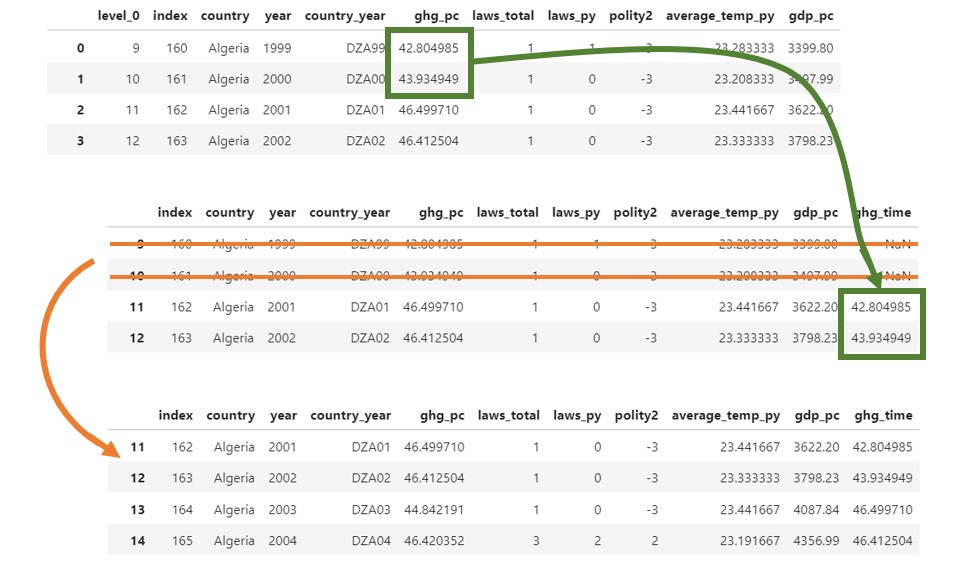

In the next step we created different scatterplots always for both correlation directions to see if we can spot differences. Visually, it is very hard to find specific differences. In the following image one can see how the datapoints between GHG->laws to laws->GHG seem to drift apart on the y-axis. This drifting apart is making it even more difficult to say, which variable has a bigger influence on which, because they cancel each other overall more or less out.

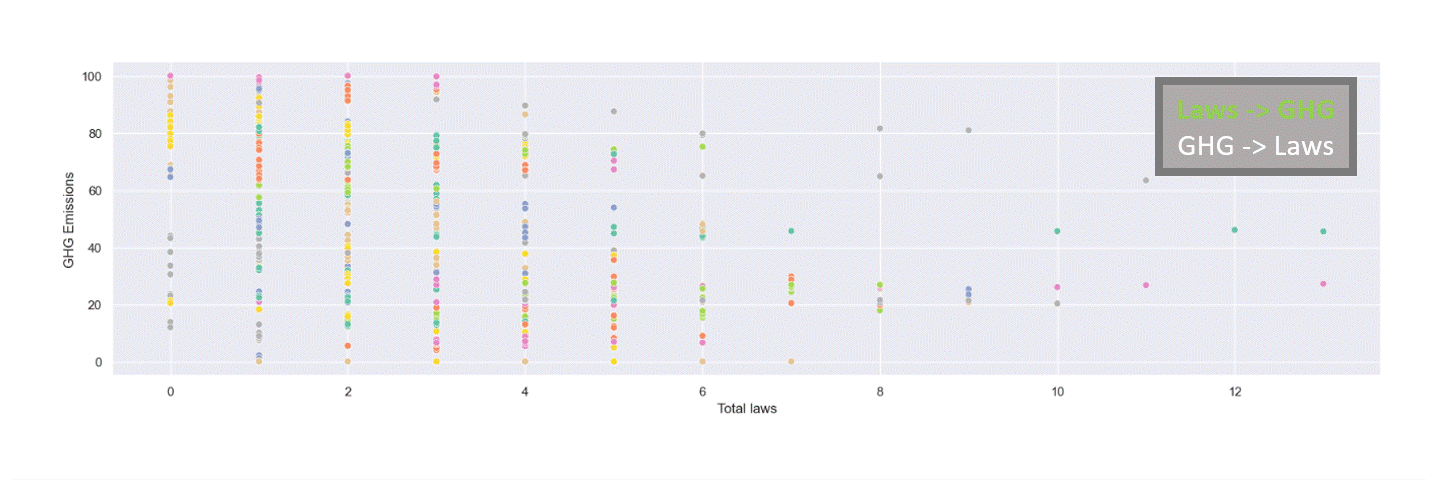

To show this canceling out effect more visually, we plotted the linear regression line of both correlations and compared them.

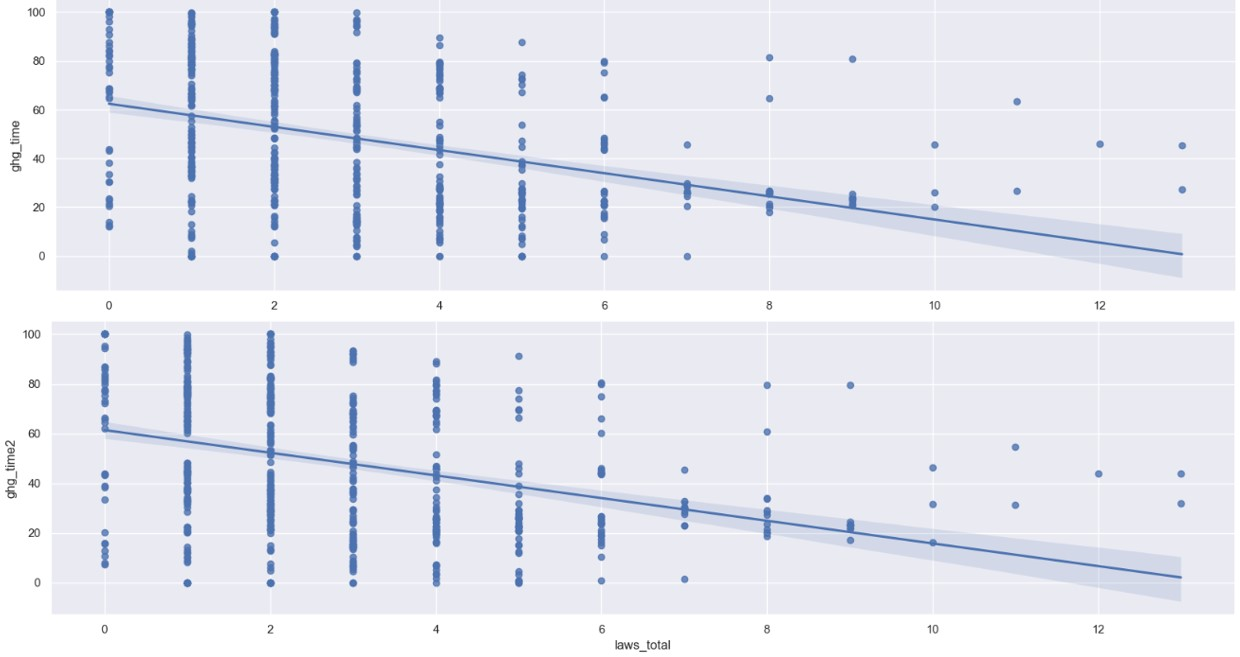

As you can see, you cannot see anything. The linear regression lines look very similar, which seems to us as if there is a strong reverse causality effect at place here. It is very hard to rule any of the options out.

In the next steps we would quantify a potential small difference with a linear regression model, but this would get rather complicated to define reliable quantified data here that can explain a "stronger" correlation direction. In general it seems here that we definitely have an issue with inverse causality and it seems very difficult to rule this possibility out, which we have already expected based on our literature review.

One way of seeing maybe stronger effects would be to increase the time span. We were considering using 5 years to see very clear effects, but this would reduce our dataset by 5 years in both directions, which would decrease it to only a couple of years of observations, which is not very precise and reliable then anymore.

### 3.4 Diff-in-Diff <a class="anchor" id="diffindiff"></a>

If we want to estimate the effect of a treatment (in our case the treatment = adoption of a new green law) on an outcome of interest (GHG emissions per capita) we need to apply Difference-in-Difference (Diff-in-Diff or DiD) method.

However, in our analysis we have one limitation concerning DiD. One key assumption of the Diff-in-Diff method is that the two groups being compared should be similar in all relevant aspects except for the treatment. In our case we cannot be sure about that since countries in EU zone and other countries around the globe can be distinguished by economies scale, population scale, cultural aspect, etc.

Despite of this limitation we will try to apply this method in order to check our intuition and reasoning.

Since the time span for our subset is from 1995 to 2011, **we need to find shock event that ideally happend between 2000 - 2005.**

Below there is the list of possible events:

   - [The Marrakesh Accords](https://www.un-redd.org/glossary/marrakesh-accords) are adopted at COP7, detailing the rules for the implementation of the Kyoto Protocol, setting up new funding and planning instruments for adaptation, and establishing a technology transfer framework to support developing countries in addressing climate change (November, 2001)
   - [Johannesburg Declaration on Sustainable Development](https://www.un.org/esa/sustdev/documents/WSSD_POI_PD/English/POI_PD.htm) (2002) -> 190 countries adopted
   - [The EU's Emissions Trading System is launched](https://www.europarl.europa.eu/news/en/headlines/society/20170213STO62208/the-eu-emissions-trading-scheme-ets-and-its-reform-in-brief), the world's first and largest emissions trading scheme, is launched as a major pillar of EU climate policy. (January, 2005) -> 30 countries: the 27 EU member states + Iceland, Liechtenstein and Norway
   - [Kyoto protocol](https://unfccc.int/kyoto_protocol) (February, 2005) -> 192 countries
    
However, it seems that it would be easier to separate countries into treatment and control with the use of EU's Emissions Trading System. So, let's work with it. A detailed code can once again be found in the [Appendix](#diffindiffapp).

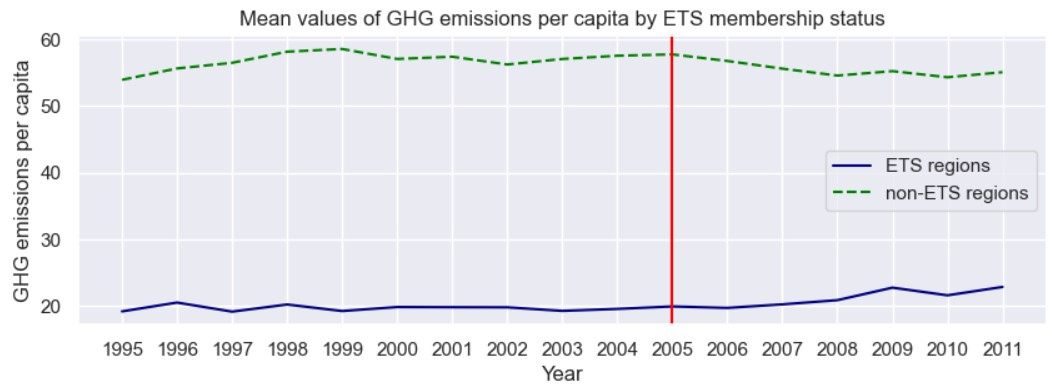

This graph shows the dynamics of mean values of GHG emissions per capita for countries with ETS status (blue line) and those that are not included in ETS programm (green line). The vertical red line separates the timeline in pre- and post- ETS periods. 

1. **ETS regions**: the values of mean GHG emissions per capita were pretty stable in the pre-ETS period, while after introducing that system it slightly increased (eventhough we expected the opposite effect).
2. **non-ETS regions**: before ETS the mean values of GHG emissions per capita fluctuated a bit but after implementation of ETS it came back to the level of 1995 (approximately).
3. We should take into account that 2005 was also a year of Kyoto Protocol development. That's why we might observe that slight fall after 2005 for non-ETS countries. To check the general effect we will try to apply further the Parallel test.

**The Parallel Test** states that the control group (non-ETS regions) and the treatment group (ETS regions) would have experienced the same trend in the outcome of interest if the treatment had not been implemented. In other words, both groups would have followed the same trajectory over time, in the absence of the treatment. 

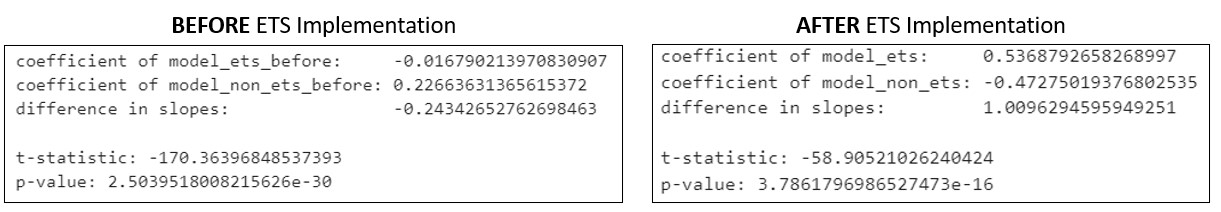

**BEFORE ETS IMPLEMENTATION**

1. The difference in slopes between the treated (ETS regions) and control (non-ETS regions) groups in a parallel trend test represents the difference in the rate of change of the trends between the two groups. A negative difference in slopes BEFORE 2015 indicates that the trend for the control group is increasing at a rate of 0.24 units per year faster than the trend for the treated group. However, taking into account the specifics of our variables, it actually means that **control group in 2005 polluted 0.24 units less in comparison with treatment group (than in the begging of our time period)**.

2. This p-value is considered to be extremely small, indicating that the difference in the trends between the treated and control groups before ETS introduction was highly statistically significant. This means that the probability of observing such a large difference in the trends by chance alone is extremely low.

**AFTER ETS IMPLEMENTATION**

1. In the case of post-ETS period we observe that ETS countries had a positive slope (meaning they were in the right path in terms of emissions reduction), while for non-ETS countries slope became negative (meaning they started to pollute more than it was before 2005). Meanwhile, the difference in slopes became positive meaning that **treatment group polluted in average 1 unit less than a control group**.
2. This p-value is also considered to be extremely small. However, this values is higher than the previous one, meaning that it is a bit less significant than before.

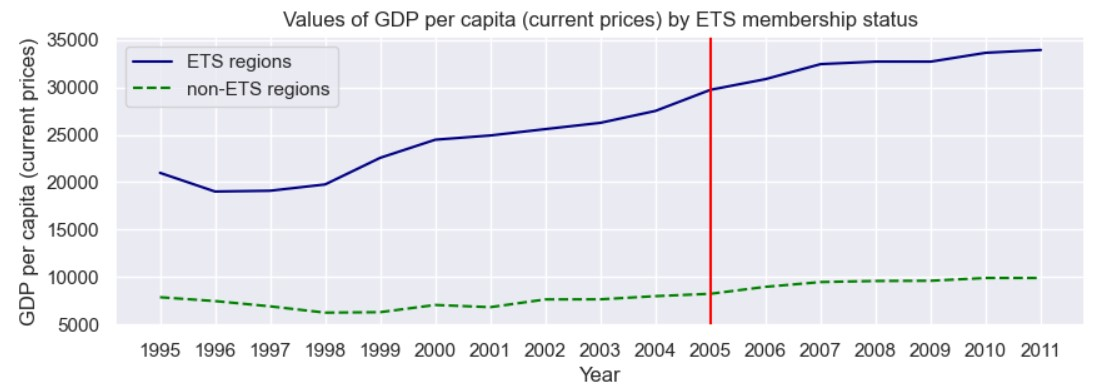

This graph above shows the dynamics of mean values of GDP per capita for countries with ETS status (blue line) and those that are not included in ETS programm (green line). The vertical red line separates the timeline in pre- and post- ETS periods. 

1. **ETS regions**: the values of mean GDP per capita changed a lot throughout our time period. It increased even after the world economic crisis in 1998 and was stable in 2008 (another economic crisis). Overall, we would say that the slopes of these two "sublines" (before and after ETS) are different: in the post-ETS period it seems less steep as it was before.
2. **non-ETS regions**: before ETS the mean values of GDP per capita was quite stable (the values for 1995 and 2005 are more or less the same) but after it increase a bit.
3. We should take into account that in average EU countries are more developed in economic terms than other countries in the world (without considering USA, Australia). That's why the blue line is above the green line here.

By doing a **parallel test**, we can discover the following:

Before ETS implementation, ETS-countries had higher rate of GDP per capita increasment. However, since the difference between slopes is positive we might say that both trends were parallel (the P-value is statistically significant).

After ETS implementation, the slope of ETS-countries decresed, meaning that after implementatin of ETS people have lost some of the speed of getting richer. On the other hand we can see that non-ETS countries had higher pace of bacoming richer than it was before 2005 (the p-value is still statistically significant, but it is higher than the previous one, meaning that it is a bit less significant than before).

## 4 Discussion <a class="anchor" id="discussion"></a>

### 4.1 Limitations and Assumptions <a class="anchor" id="limitations"></a>

Firstly, based on our literature review we already observed that the chosen topic has been analysed previously in many research papers, which all found many possible influencing factors. The literature shows that there are many arguments for and against a direct causal relation and it seems to be nearly impossible to rule everything out. This is what we also experienced in this research. We found many reasons for why our causality can be questioned (see Causal Analysis and Outlook), but were not able to rule any of them completely out based on our analysis.

Secondly, we had limited datasets. For some of the possible pitfalls of our causal relation we needed extra data (e.g.: The total number of laws in each country for the different years (see Outlook)). These datasets do, however, either not exist, cannot be found or only have restricted access. With more time one could now start a data collection from different sources and combine them in one dataset to use for this analysis. Due to time restrictions we were not able to do that in this case.

Another datasets limitation that we observed was about description in codebooks. We found out that in case of GDP per capita is was not accurate. Actually, with the help of Boris Thurm we figured out that this variable has completely opposite interpetation: a score of 100 indicates a country is among the least polluting on a per capita bases (≤5th-percentile), and a score of 0 indicates that a country is among the most polluting (≥95th-percentile). The useful link is [here](https://epi.yale.edu/epi-results/2020/component/ghp).

We assume that the environmental laws data in our analysis is directly linked to emissions. However, there are many environmental laws focusing on other aspects of sustainability like water treatment and more. There most certainly are laws involved in our dataset, which were created for environmental reasons that cannot logically be connected to air quality and, hence, might bias our dataset.

We further assume that the number of laws is a good indicator for awareness and action of a government to fight Climate Change. However, there can be other indicators, which might give clearer indications like the stringency index for example. A country that has high stringency might not need as many laws, as the few existing ones are already highly effective and vice versa. This would mean that our indication of number of laws can be misleading.

We barely looked at key events in our data like international legislation or big natural disasters. These events can create huge peaks and gaps in our data and especially natural disasters can boost the development of laws without being related to emissions.

However, in our analysis we have one limitation concerning DiD. One key assumption of the Diff-in-Diff method is that the two groups being compared should be similar in all relevant aspects except for the treatment. In our case we cannot be sure about that since countries in EU zone and other countries around the globe can be distinguishes by economies scale, population scale, cultural aspect, etc.

### 4.2 Outlook <a class="anchor" id="outlook"></a>


*Omitted Variable:* **Stringency**

One variable we could have included and maybe should have used instead of or in combination with the number of laws is the stringency variable. As mentioned in the limitations and assumpitons chapter, we assume that the number of environmental laws is a good indicator for the influence of legislation on GHG emissions. However, as discussed before a big number of laws does not have a big influence if the country is not able to sufficiently implement them. The stringency index plays a big role here and we have data of the stringency index in our dataset. So, one of our very next steps in our analysis would be to include this variable in our analysis. We would, however, use it in combination with the number of laws as we think that the stringency of laws does not necessarily change to much over time and is also more difficult for a government in an established system to change, while an actual change can happen on the number of laws, which multiplies the efficiency of the stringency.

*Omitted Variable:* **Total Number of laws**

The total number of laws of a country can stand in relation to the number of environmental laws. There can be a country which is very active in legislation (for various reasons) and therefore also create many environmental laws. This might not be related to the environmental awareness, but can rather be an effect of legislation activity. To check for this variable we would need to find a dataset of total laws created in each country for each year and create a new variable, which takes the percentage of environmental laws to all laws. A change in this percentage would indicate that a government either increases or decreases the focus on environmental laws and this percentage can then be used for a further analysis.


*Omitted Variable:* **NGO activity and public awareness + natural disasters and people affected**

Depending on the activites of NGOs in the field and public awareness, the governments can be more pressured to create the necessary laws. Public awareness and NGO activity can be found in our QoG dataset but with limited years and countries. Alternatively, we could try to find data on number of news coverage of environmental topics and assume the public awareness based on this. The check for these variables, however, does not proof or disproof our intial causal relation, as the air quality might directly influence the NGO activities and public awareness, which then has an effect on the number of laws (Instrumental variable?).


Furthermore, we already started checking for differences in **democracies and autocracies** in our analysis, but this can be extended in many directions and can lead to interesting results. We ourselves asked us the question whether it is true that autocracies could be better in tackling Climate Change, because they can act faster and enforce laws more quickly than democracies. This, however, is a research question in itself and needs many different analysis approaches. On a first glimpse we could not find clear patterns in our data analysis, but this was also not a focus of our research question. Hence, we did not dive deeper into analysing potential differences.

These are just a few examples of further factors we would need to include in our analysis in the future. Due to time constraints and lack of data we were not able to go deeper into this topic and the afforementioned factors are by far not all we thought about. There are factors like
- industrial activity: which could potentially be linked to GDP, but not completely (in general countries who are more dependent on manufacturing sectors for example also will emit more GHGs than countries in the service-sector
- access to renewable energy: some countries have better geographical locations and space to make use out of solar, wind or aqua power. This can influence their emissions as well.
- population density: this can have an effect especially on the transportation sector, which influences GHG emissions, because lower populated countries need to have their people travel further for their daily lives, which increases their emissions.

There were many of these variables that we discussed about and some of them can be related to other variables and, hence, we can ignore them or some of them might not effect the laws in general and can therefore be disregarded. However, during our research and work on this analysis we discovered more and more factors to take into account and each one of them takes a lot of time in itself to check if there is an actual influence, in what way this factor can influence our data and if we can find enough data on this factor to take it into account. All these time consuming tasks stopped us from further analysing our hypothesis and coming to a concrete conclusion.

However, the research shows that this seems to be a general problem in the field. As there are so many factors to take into account that there is not one research paper that was able to include all factors and come to a clear conclusion. To us it seems at the moment rather that there is currently no way of finding a definite answer to our research question.

## 5 Conclusion <a class="anchor" id="summary"></a>

In summary, we expected this analysis to be difficult and wanted to rather challenge us with a difficult correlation than to explore a more obvious causality. As we have seen in this article, there are many factors that can influence the causality between the number of laws and GHG emissions, which is why also in our literature review we saw many different angles on the topic.

We explored the data and already discovered in the exploration phase that there are many things we could consider in different scenarios. Based on our further analysis and using different methods for causality we then came to the conclusion that we can neither fully rule out the causal effect of laws on emissions, but neither can we prove that such an effect exists. Reverse causality and other omitted variables let us believe that there is a lot more behind this problem statement than we were able to tackle in this short time and this short article. 

However, seeing all the possibilities and ways one can explore data and search for causality lets us be confident about our findings and besides the frustration along the way, we discovered what a real causal analysis means: it is a never ending story, in which we get step by step closer to our goal, but we will never fully reach it.

# Appendix <a class="anchor" id="appendix"></a>

### Appendix 1: Import <a class="anchor" id="appendix1"></a>

If you want to jump back to the content of the article or to different sections in the Appendix, please click on one of the follwing links:
    
[Content](#content)

[Appendix: Import](#appendix1)

[Appendix: Data Exploration](#appendix2)

[Appendix: Causality Analysis](#appendix3)

Fot this assignment we used a lot of different packages that helped us for data exploration, data visualisation, and statistical analysis. Based on this classification we separated them in the following categories:

In [1]:
# data exploration
import pandas as pd
import numpy as np
from scipy.stats import skew

# data visualisation
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# statistical model
from linearmodels import PanelOLS
import statsmodels.formula.api as smf
import linearmodels as lm
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

# plots settings
sns.set(rc={'figure.figsize': (20, 5)})

/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


We used 3 different datasets. Thanks to Edoardo Chiarotti we actually merged only 2 because we used already cleaned and prepared version of QOG and Polity5 merged dataset. The link to repository with the dataset file is [here](https://github.com/edoardochiarotti/class_datascience/tree/main/Notebooks/Assignment/individual_assignment/clean_data_prepared_EDA).

First things first: we need to read all our datasets and merge them.

In [2]:
# qog and polity dataset
url_qog = "https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/2022/Assignment/individual_assignment/clean_data_prepared_EDA/df_qog_polity_merged.csv"
qog_df = pd.read_csv(url_qog, encoding='latin-1')
qog_df_subset = qog_df.loc[:, ('country', 'year', 'ccodealp_year', 'epi_ghp', 'ccl_nmitlp', 'ccl_mitlpp', 'polity2', 'cckp_temp')]
qog_df_subset = qog_df_subset.dropna()

In [3]:
# gdp dataset
url_gdp = "https://raw.githubusercontent.com/mivelikikh/qog_group_project/main/gdp_var.csv"
gdp_df = pd.read_csv(url_gdp, sep=';')
gdp_df = gdp_df.loc[:, ('ccodealp_year', 'gle_cgdpc')]
gdp_df = gdp_df.dropna()

In [4]:
# Merge the two dataframes on the 'ccodealp_year' column
df = pd.merge(qog_df_subset, gdp_df, how='right', on='ccodealp_year')
df = df.dropna()
df = df.reset_index()

In the next step we rename variables in a more concise way. To be as short as possible we wiil use the following cuts:

- **pc** - per capita
- **py** - per year

In [5]:
df.rename(columns = {'ccodealp_year': 'country_year'}, inplace = True)
df.rename(columns = {'epi_ghp': 'ghg_pc'}, inplace = True)
df.rename(columns = {'ccl_nmitlp': 'laws_total'}, inplace = True)
df.rename(columns = {'ccl_mitlpp': 'laws_py'}, inplace = True)
df.rename(columns = {'cckp_temp': 'average_temp_py'}, inplace = True)
df.rename(columns = {'gle_cgdpc': 'gdp_pc'}, inplace = True)

df

index  country    year country_year     ghg_pc  laws_total  laws_py  \
0       115  Albania  2003.0        ALB03  62.423880         1.0      1.0   
1       116  Albania  2004.0        ALB04  63.066149         1.0      0.0   
2       117  Albania  2005.0        ALB05  62.657502         1.0      0.0   
3       118  Albania  2006.0        ALB06  63.926970         1.0      0.0   
4       119  Albania  2007.0        ALB07  64.317704         1.0      0.0   
...     ...      ...     ...          ...        ...         ...      ...   
1715   9378   Zambia  2007.0        ZMB07  66.989888         2.0      1.0   
1716   9379   Zambia  2008.0        ZMB08  67.292225         4.0      2.0   
1717   9380   Zambia  2009.0        ZMB09  69.323288         4.0      0.0   
1718   9381   Zambia  2010.0        ZMB10  67.606317         5.0      1.0   
1719   9382   Zambia  2011.0        ZMB11  68.817045         6.0      1.0   

      polity2  average_temp_py   gdp_pc  
0         7.0        11.958333  4803,28  
1         7.0        11.708333  5111,77  
2         9.0        11.225000  5533,09  
3         9.0        11.675000  6072,21  
4         9.0        12.333333  6537,80  
...       ...              ...      ...  
1715      5.0        22.200000  1628,14  
1716      7.0        22.008333  1657,15  
1717      7.0        22.258333  1810,42  
1718      7.0        22.658333  1875,52  
1719      7.0        21.991667  1916,79  

[1720 rows x 10 columns]

Oh, look at the 'gdp_pc'! Why does it have comma instead of dot separator?
Just to be sure: what datatypes do we have?

In [6]:
df.dtypes

index                int64
country             object
year               float64
country_year        object
ghg_pc             float64
laws_total         float64
laws_py            float64
polity2            float64
average_temp_py    float64
gdp_pc              object
dtype: object

Aha! We got it!'gdp_pc' is actually a object now. Let's transform it to float64 format.

Variable 'year' we will also transform to int format.

In our opinion, both features of numbers of laws cannot be in a float menner, so we will also transform them in an int format.

Moreover, 'polity2', by its definition, can also be only in an int format. So, we will also fix it.

In [7]:
df['gdp_pc'] = df['gdp_pc'].str.replace(',', '.')
df['gdp_pc'] = df['gdp_pc'].astype(dtype='float64')

In [8]:
df['year'] = df['year'].astype(dtype='int')
df['laws_total'] = df['laws_total'].astype(dtype='int')
df['laws_py'] = df['laws_py'].astype(dtype='int')
df['polity2'] = df['polity2'].astype(dtype='int')

In [9]:
df.dtypes

index                int64
country             object
year                 int64
country_year        object
ghg_pc             float64
laws_total           int64
laws_py              int64
polity2              int64
average_temp_py    float64
gdp_pc             float64
dtype: object

Okey! Now it is perfect!

Next, we need to assign our variables to specific variables that we will use to automate the process a bit. It also gives you a hint of what we study and through what we study it ;)

In [10]:
target_feature = "ghg_pc"
target_feature_name = "GHG emissions per capita"

exp_feature_1 = "laws_total"
exp_feature_1_name = "Number of climate change mitigation laws and policies"

exp_feature_2 = "polity2"
exp_feature_2_name = "Political regime score"

exp_feature_3 = "gdp_pc"
exp_feature_3_name = "GDP per capita (current prices)"

features = [exp_feature_1, exp_feature_2, exp_feature_3]
feature_names = [exp_feature_1_name, exp_feature_2_name, exp_feature_3_name]

all_features = [exp_feature_1, exp_feature_2, exp_feature_3, target_feature]
all_features_names = [exp_feature_1_name, exp_feature_2_name, exp_feature_3_name, target_feature_name]

colors = ['blue', 'blue', 'blue', 'orange']
time = 'year'
ghg_pc = 'ghg_pc'
ghg_time = 'ghg_time'
ghg_time2 = 'ghg_time2'

Other variables that we included in our dataset we will use in the advanced part of causal analysis as control variables. So we don't need to include them here.

This is all the code needed for the the other parts of the notebook to work.
If you want to read the causal analysis now, click [here](#introduction) and enjoy!

### Appendix 2: Data Exploration <a class="anchor" id="appendix2"></a>

If you want to jump back to the content of the article or to different sections in the Appendix, please click on one of the follwing links:
    
[Content](#content)

[Appendix: Import](#appendix1)

[Appendix: Data Exploration](#appendix2)

[Appendix: Causality Analysis](#appendix3)

#### Univariative analysis

In this section, we will use descriptive statistics to:
1. Study the distribution of the variables, we will see if we should transform the data or not, tackle with outliers or not.
2. Choose the right statistical tools (correlation, regression, bar/line graphs, scatter plot, Diff-in-Diff etc.).
3. Get an idea of the underlying variation: how the variable varies over time (line graph) and space (map). It should help to get a better understanding of the dataset and potentially spot some anomalies or interesting shocks.

In [11]:
df.describe()

index         year       ghg_pc  laws_total      laws_py  \
count  1720.000000  1720.000000  1720.000000  1720.00000  1720.000000   
mean   4773.043605  2004.629070    49.859730     2.47093     0.366860   
std    2731.098645     4.547042    29.968512     2.30947     0.676847   
min     115.000000  1995.000000     0.000000     0.00000     0.000000   
25%    2333.750000  2001.000000    24.311765     1.00000     0.000000   
50%    4656.500000  2005.000000    47.579660     2.00000     0.000000   
75%    7058.250000  2009.000000    76.961342     3.00000     1.000000   
max    9382.000000  2011.000000   100.000000    16.00000     5.000000   

           polity2  average_temp_py         gdp_pc  
count  1720.000000      1720.000000    1720.000000  
mean      4.151163        17.729797   11845.304262  
std       6.339287         8.586588   14377.299878  
min     -10.000000        -7.433333     173.110000  
25%      -2.000000        10.218750    2111.960000  
50%       7.000000        20.887500    5329.635000  
75%      10.000000        25.208333   18212.707500  
max      10.000000        29.366667  112560.180000

**Notes:**

1. 'laws_total', 'laws_py', and	'polity2' are discrete variables, other variables are continuous
2. except for 'polity2', and 'average_temp_py' for all our variables of interest mean is higer than median. It means that distribution of these two variables data is skewed to the left.

Let's see how many observations do we have per year:

In [12]:
df[pd.notnull(df[target_feature])].groupby(['year']).size().reset_index(name='observations')

year  observations
0   1995            41
1   1996            48
2   1997            58
3   1998            68
4   1999            74
5   2000            83
6   2001            90
7   2002            97
8   2003           107
9   2004           112
10  2005           117
11  2006           123
12  2007           131
13  2008           135
14  2009           141
15  2010           144
16  2011           151

Ok, we don't have a relatively constant sample size. However, we will not "clean" it because we think that all these observations might help us in the following steps of analysis. Let's observe distribution among countries:

In [13]:
obs_countries = df.groupby(['country']).size().reset_index(name='observations')
obs_countries

country  observations
0                              Albania             9
1                              Algeria            13
2                               Angola             4
3                            Argentina            14
4                              Armenia            17
..                                 ...           ...
147  Venezuela, Bolivarian Republic of             6
148                           Viet Nam             1
149                              Yemen            17
150                             Zambia            17
151                           Zimbabwe            17

[152 rows x 2 columns]

So, we see here that some countries have less observations than others. It is a time to have a visualisation of it:

In [14]:
obs_countries_fig = px.choropleth(obs_countries, 
                                  locations='country',
                                  locationmode='country names',
                                  color='observations', 
                                  hover_name='country',
                                  color_continuous_scale=px.colors.sequential.Sunset)
obs_countries_fig.show()

Almost wonderful! Africa is a kind of "blind spot" but we have observation almost arount the globe.

##### **Histograms**

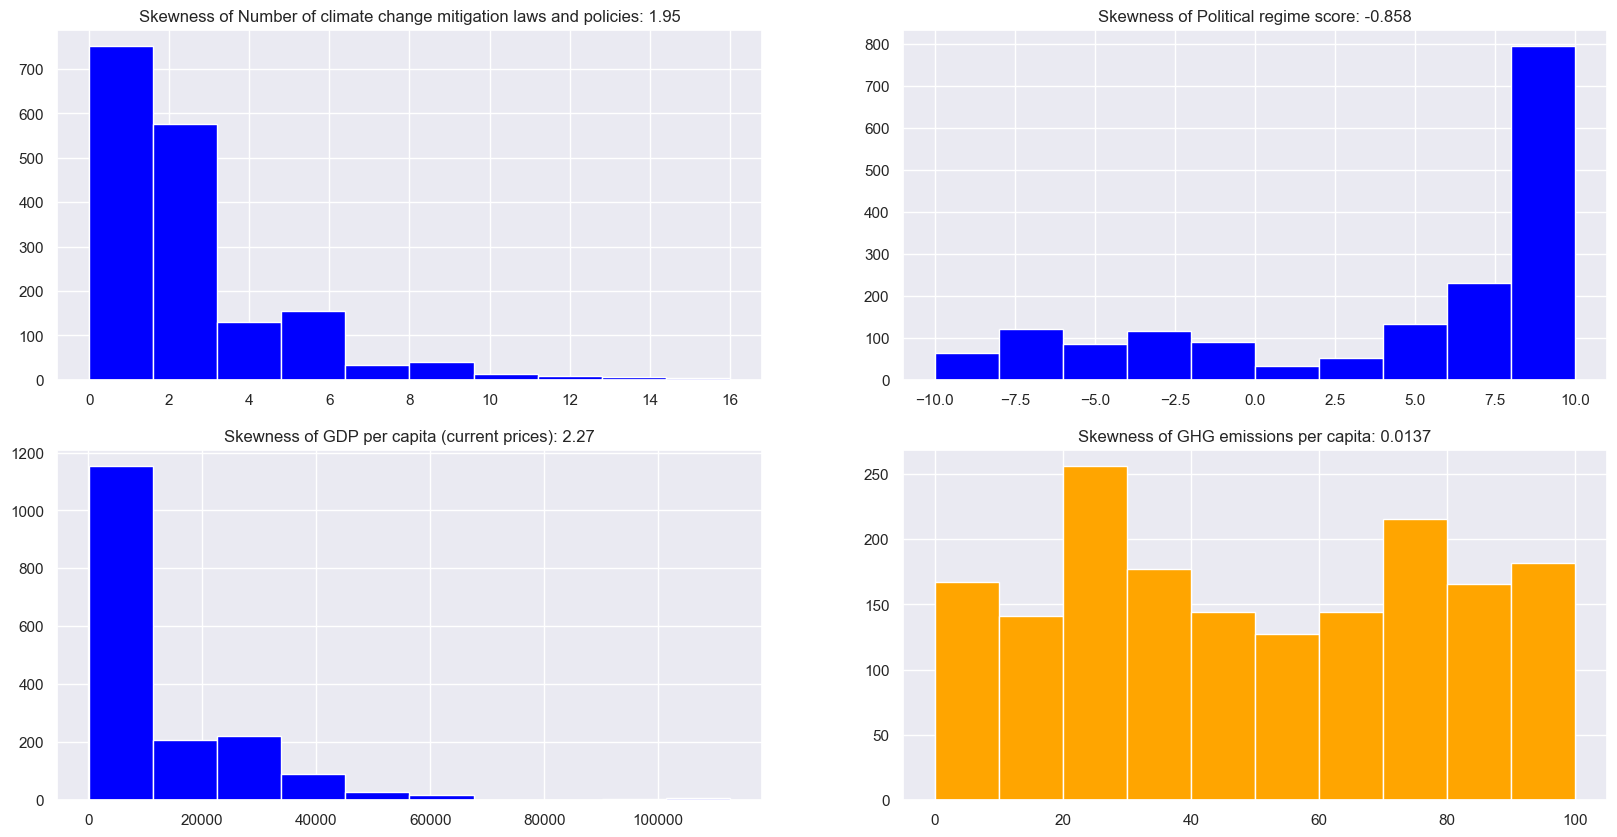

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for ax, feature, feature_name, color in zip(axes.flatten(), all_features, all_features_names, colors):
    ax.hist(df[feature], color=color)
    ax.set_title(f"Skewness of {feature_name}: {skew(df[feature], nan_policy='omit'):.3}")

**Notes:**

1. We do not need to log-transmorm our variables since the skewness of each is in the range between -3 and 3. 
2. Indeed, as we expected, the distribution of 'political regime score' is skewed to the left, while other variables are skewed to the right.
3. The distribution of our target variable is almost perfectly balanced.

##### **Maps**

To draw maps in a compact way we will use a custom function 'plot_a_feature_map'

In [16]:
def plot_a_feature_map(feature, feature_name, color):
    feature_map = df.groupby(['country']).mean()
    feature_map.reset_index(inplace=True)

    fig_feature_map = px.choropleth(feature_map, 
                                    locations='country',
                                    locationmode='country names',
                                    color=feature,
                                    color_continuous_scale=color)

    fig_feature_map.update_layout(title={'text': f"Spatial distribution of the mean {feature_name}",
                                       'y':0.95,
                                       'x':0.5,
                                       'xanchor': 'center',
                                       'yanchor': 'top'})

    fig_feature_map.show()

**color for exp_features:** px.colors.sequential.Blues

**color for target_feature:** px.colors.sequential.Oranges

In [17]:
plot_a_feature_map(exp_feature_1, exp_feature_1_name, px.colors.sequential.Blues)

/var/folders/_2/fq28qryj11g4b72xcm9l0b180000gn/T/ipykernel_3940/2175984698.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Notes:**

1. More laws are in South America countries (Brazil, Argentina), EU zone and UK. A little bit less in asian (India, Japan, Indonesia, Vietnam)
2. Less laws are African countries

In [18]:
plot_a_feature_map(exp_feature_2, exp_feature_2_name, px.colors.sequential.Blues)

/var/folders/_2/fq28qryj11g4b72xcm9l0b180000gn/T/ipykernel_3940/2175984698.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Notes:**

1. Democratic countries are mostly in North and South (except for Venezuela) Americas and EU. There are also Australia, Japan and Mongolia.
2. Autoritarian countries are mostly in Asia part of the globe: China, Kazakhstan, Vietnam.

In [19]:
plot_a_feature_map(exp_feature_3, exp_feature_3_name, px.colors.sequential.Blues)

/var/folders/_2/fq28qryj11g4b72xcm9l0b180000gn/T/ipykernel_3940/2175984698.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Notes:**

1. The wealthiest conutries is Qatar, but among others are EU zone, North America and Australia
2. The poorest countries are in Africa and Asia.

In [20]:
plot_a_feature_map(target_feature, target_feature_name, px.colors.sequential.Oranges)

/var/folders/_2/fq28qryj11g4b72xcm9l0b180000gn/T/ipykernel_3940/2175984698.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Notes:**

1. More GHG emissions are in African and Asian countries where is cheeper to locate production factory (we guess).

##### **Line trends**

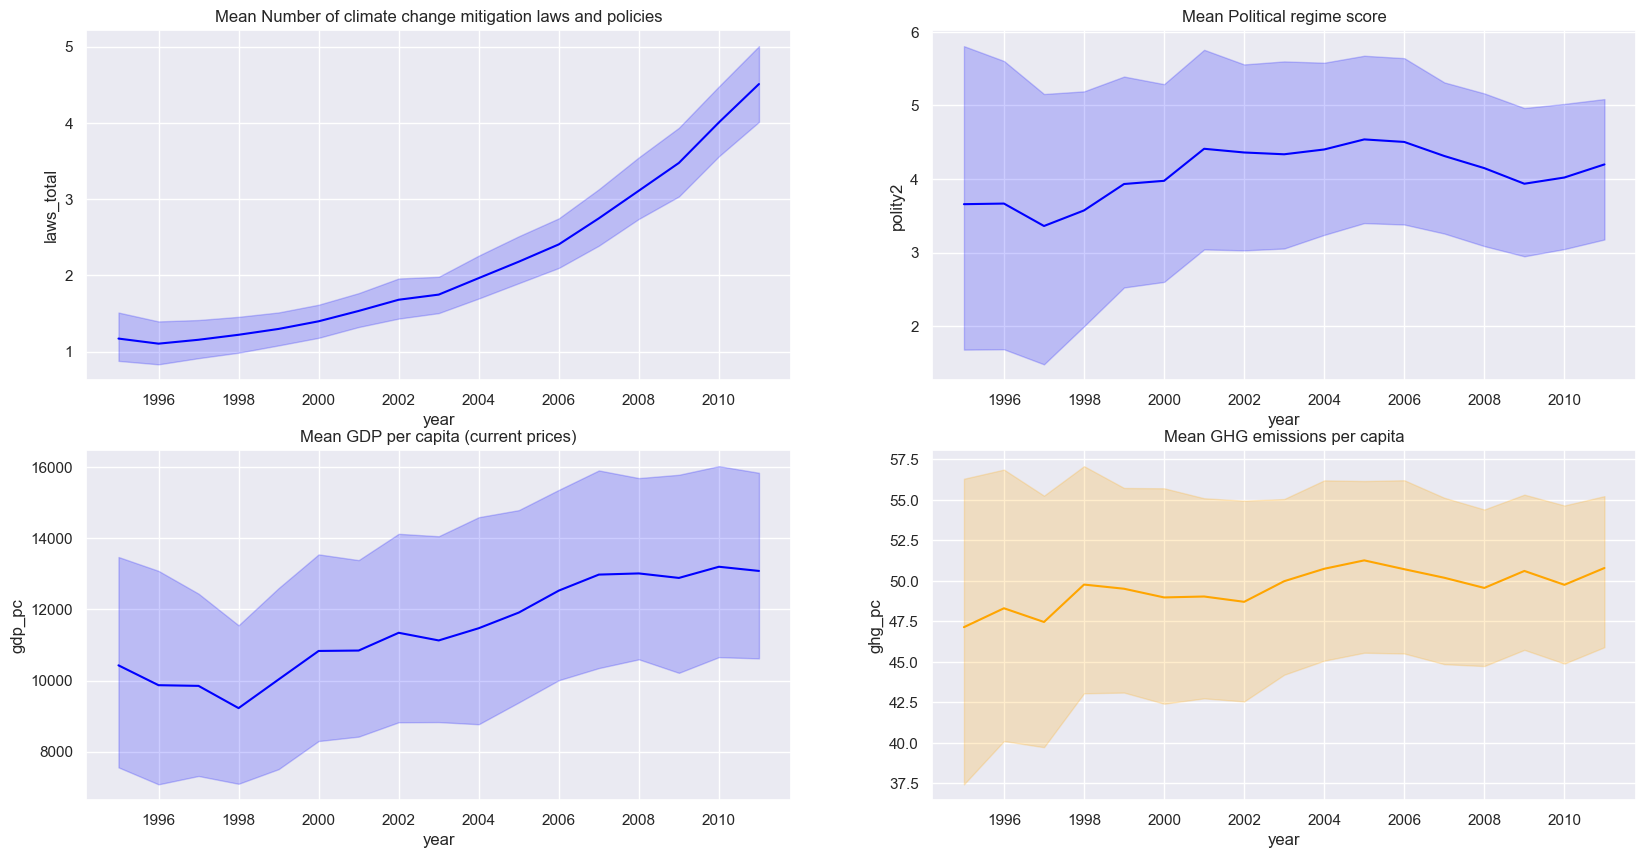

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for ax, feature, feature_name, color in zip(axes.flatten(), all_features, all_features_names, colors):
    sns.lineplot(x='year', y=feature, data=df, ax=ax, color=color)
    ax.set_ylabel(f"{feature}")
    ax.set_title(f"Mean {feature_name}")

**Notes:**

1. Overall, there are positive trends for each feature.
2. Overall, we observe less variation year after year (the shaded area becomes smaller).
3. GDP per capita: interesting drop in 1998 (world financial crisis).
4. Political regime score: small decline after 2005. It would be interesting to explore this.
5. GHG emissions per capita: small drop in 2005 (probably due to Kyoto protocol) we wiil explore this event deeply.

These were all codes regarding the descriptive analysis of the data at hand.
To go back to the article click on one of the following links:

[Content](#content)

[Introduction](#introduction)

[Data Exploration](#data_exploration)

[Causal Analysis](#causality_analysis)

### Appendix 3: Causality Analysis <a class="anchor" id="appendix3"></a>

To move to a specific part of the causality analysis click on one of the following links:

[Scatterplot](#scatter)

[Reverse Causality (Time Lag Analysis)](#timelag)

[Diff-in-Diff](#diffindiffapp)

#### Scatterplot <a class="anchor" id="scatter"></a>

In the first step we define how our scatterplot will work.

In [22]:
def plot_features_against_target(target_feature, target_feature_name,
                                 features, feature_names,
                                 colors=None, color_base=None):
    fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(20, 20))
    
    palette = None
    if color_base is not None:
        colors = [None] * len(features)
        palette = "Spectral"
    elif colors is None:
        colors = ['red'] * len(features)

    for ax, feature, feature_name, color in zip(axes.flatten(), features, feature_names, colors):
        sns.scatterplot(x=feature, y=target_feature, data=df,
                        ax=ax, legend=True,
                        hue=color_base, color=color, palette=palette)
        ax.set_xlabel(f"{feature_name}")
        ax.set_ylabel(f"{target_feature_name}")

Now, let's plot our features against the target one:

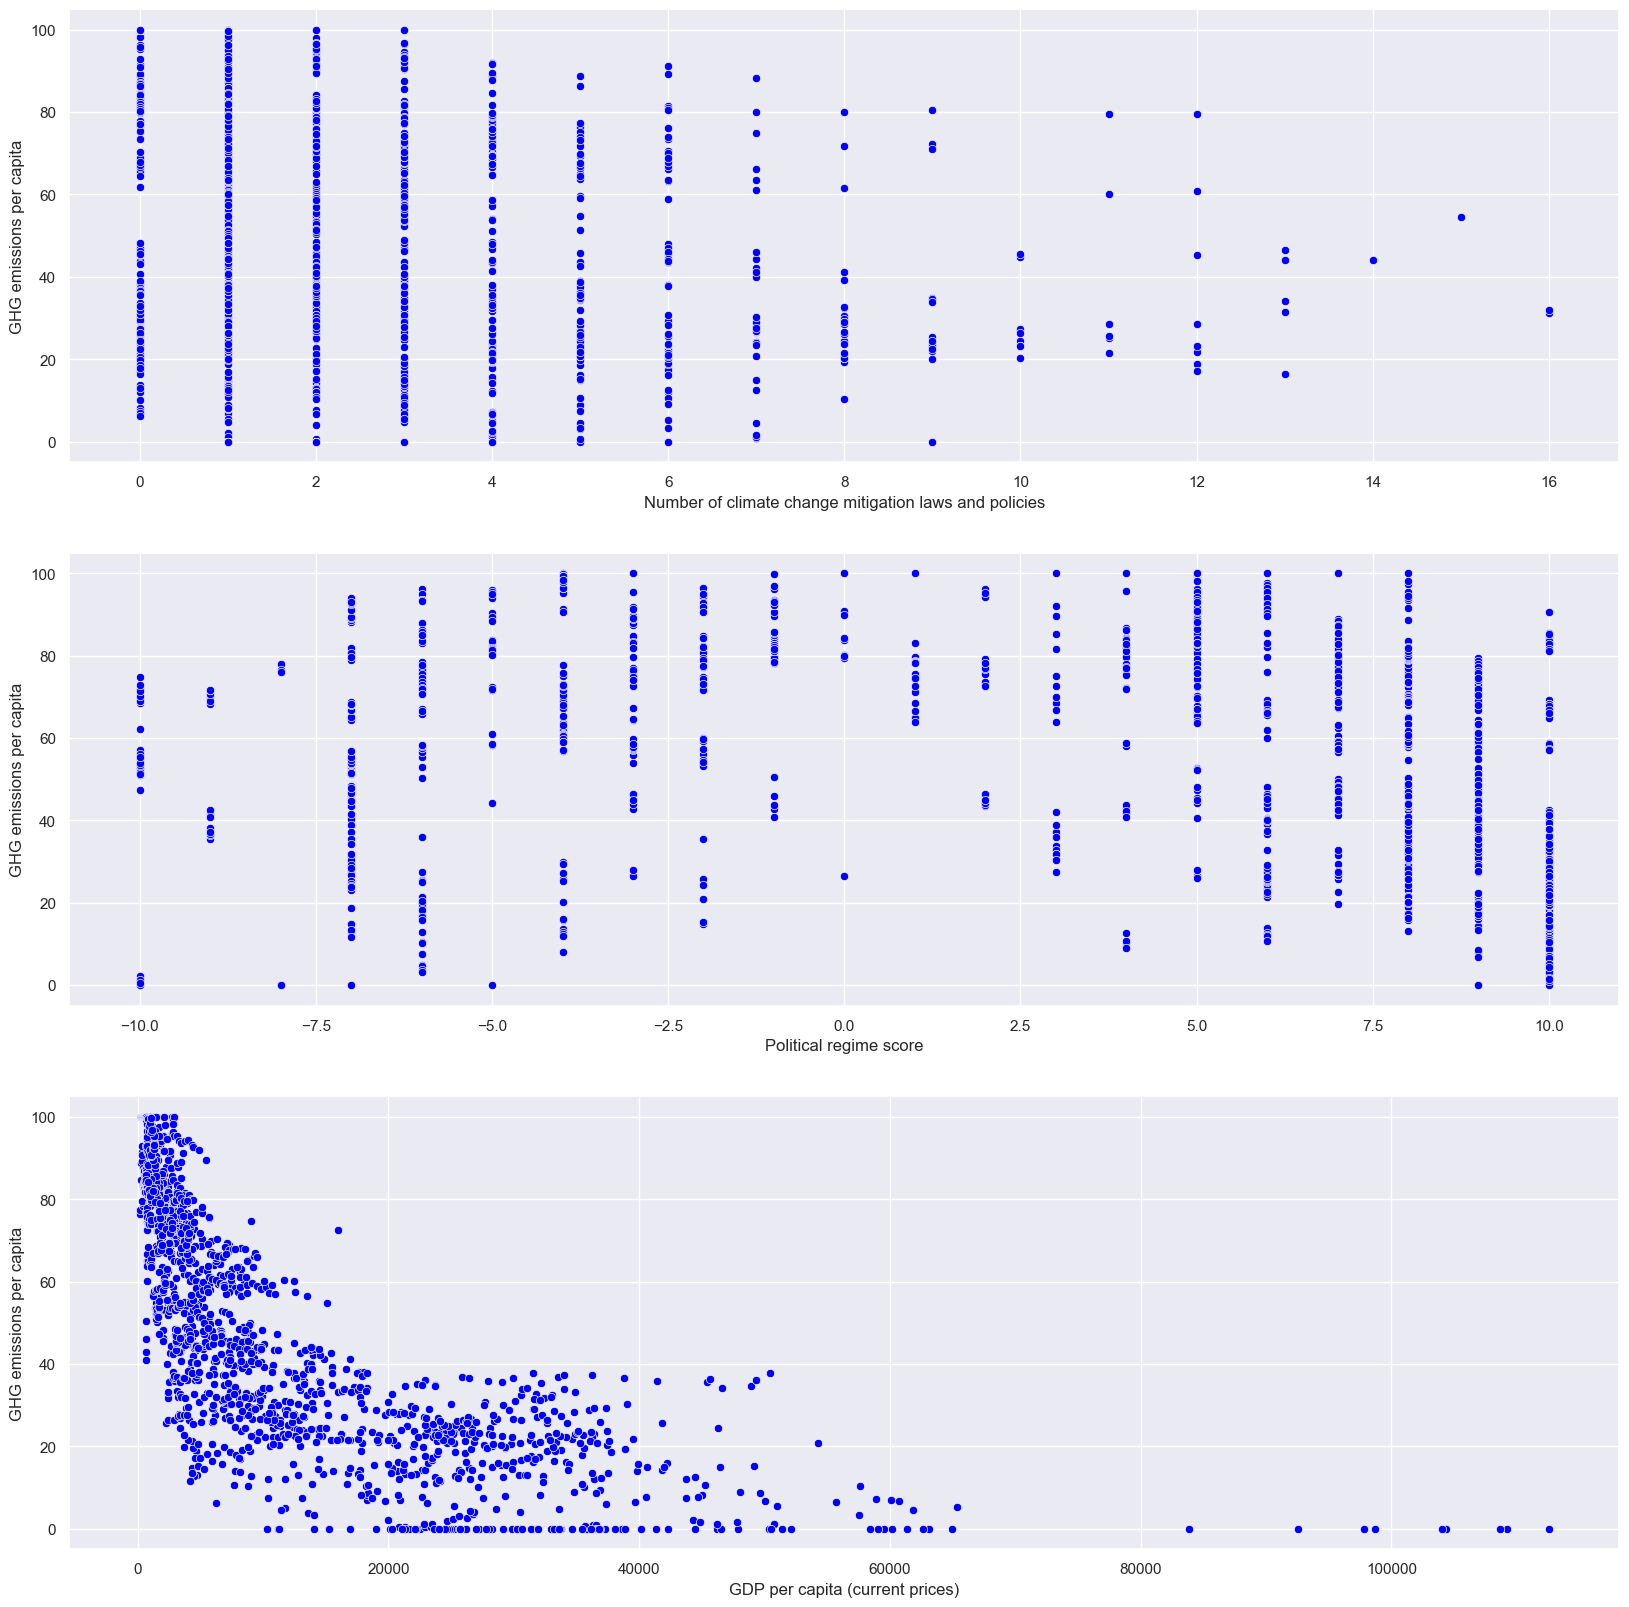

In [23]:
plot_features_against_target(target_feature=target_feature, target_feature_name=target_feature_name,
                             features=features, feature_names=feature_names,
                             colors=colors, color_base=None)

So, what do we see from this plots? Actually, almost nothing. We observe some beautiful pattern in the last one, so let's make it even more beautiful with different colorisation ways. We will use percentiles of each variable in order to observe some underlying patterns behind that graphs.

#### Scatteplots with colorisation by percentiles

If you want to jump back to the content of the article or to different sections in the Appendix, please click on one of the follwing links:
    
[Content](#content)

[Appendix: Import](#appendix1)

[Appendix: Data Exploration](#appendix2)

[Appendix: Causality Analysis](#appendix3)

First, we need to create a new column with percentiles values and add them in our dataframe.

In [24]:
new_columns = ['laws_total_quantiles', 'polity2_quantiles', 'gdp_pc_quantiles']

for column, feature in zip(new_columns, features):
    df[column] = pd.qcut(df[feature], q=5, precision=0, duplicates='drop')

Then, we will use a custom function to plot the same scatterplots but with different colorisation base:

In [25]:
def scatteplot_color_base(color_base):
    plot_features_against_target(target_feature=target_feature, target_feature_name=target_feature_name,
                                 features=features, feature_names=feature_names,
                                 colors=None, color_base=color_base)

##### a) Number of climate change mitigation laws and policies


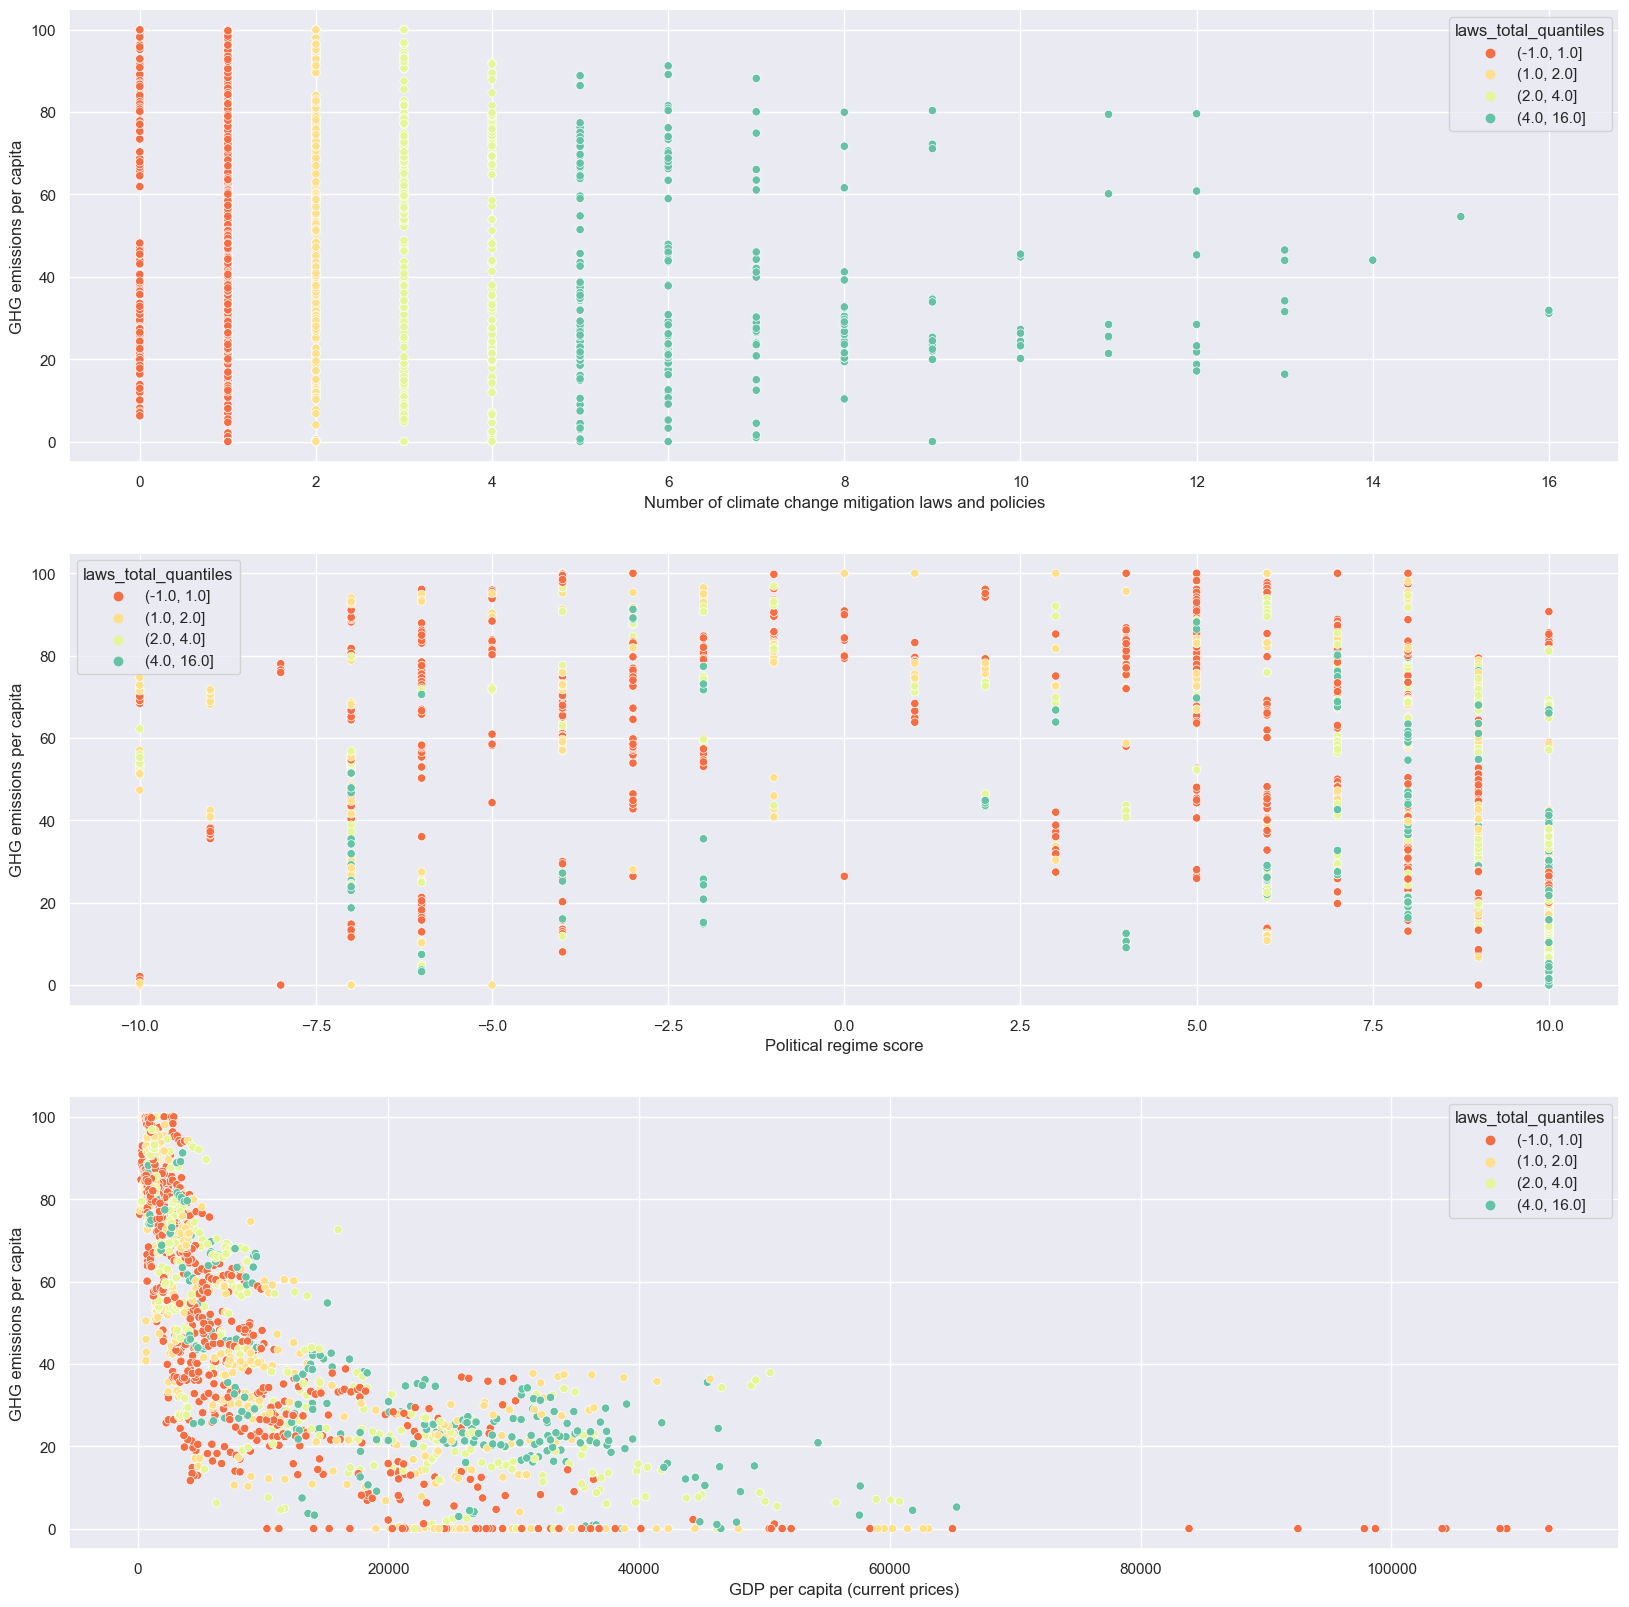

In [26]:
scatteplot_color_base('laws_total_quantiles')

**Notes:**

1. The first graph (Total number of laws vs. GHG emissions per capita) is useless since it color by laws that we also used as a variable for an X-axis.
2. The second grapth (Political regime score vs. GHG emissions per capita) explains that both democratic  and autocratic countries can have all possible values for number of laws (0 - 16) because we observe blue dots (Number of laws > 4) and red dots (1 law) across the whole horizontal axis. However, if we consider the very extreme cases (full democracies and full autocracies) we can (more or less) see that the more democratic country is, the green laws it has and vice versa.
3. The third graph (GDP per capita vs. GHG emissions per capita) states that countries with low amount of green laws are mostly poor (see the location of red dots in the upper left corner of the plot) while "middle-income" states (blue dots) have more than 4 laws. At the same time, **countries with more laws in place tend to emit more** GHG (in average) than those who have only 1 law.

##### b) Political regime score


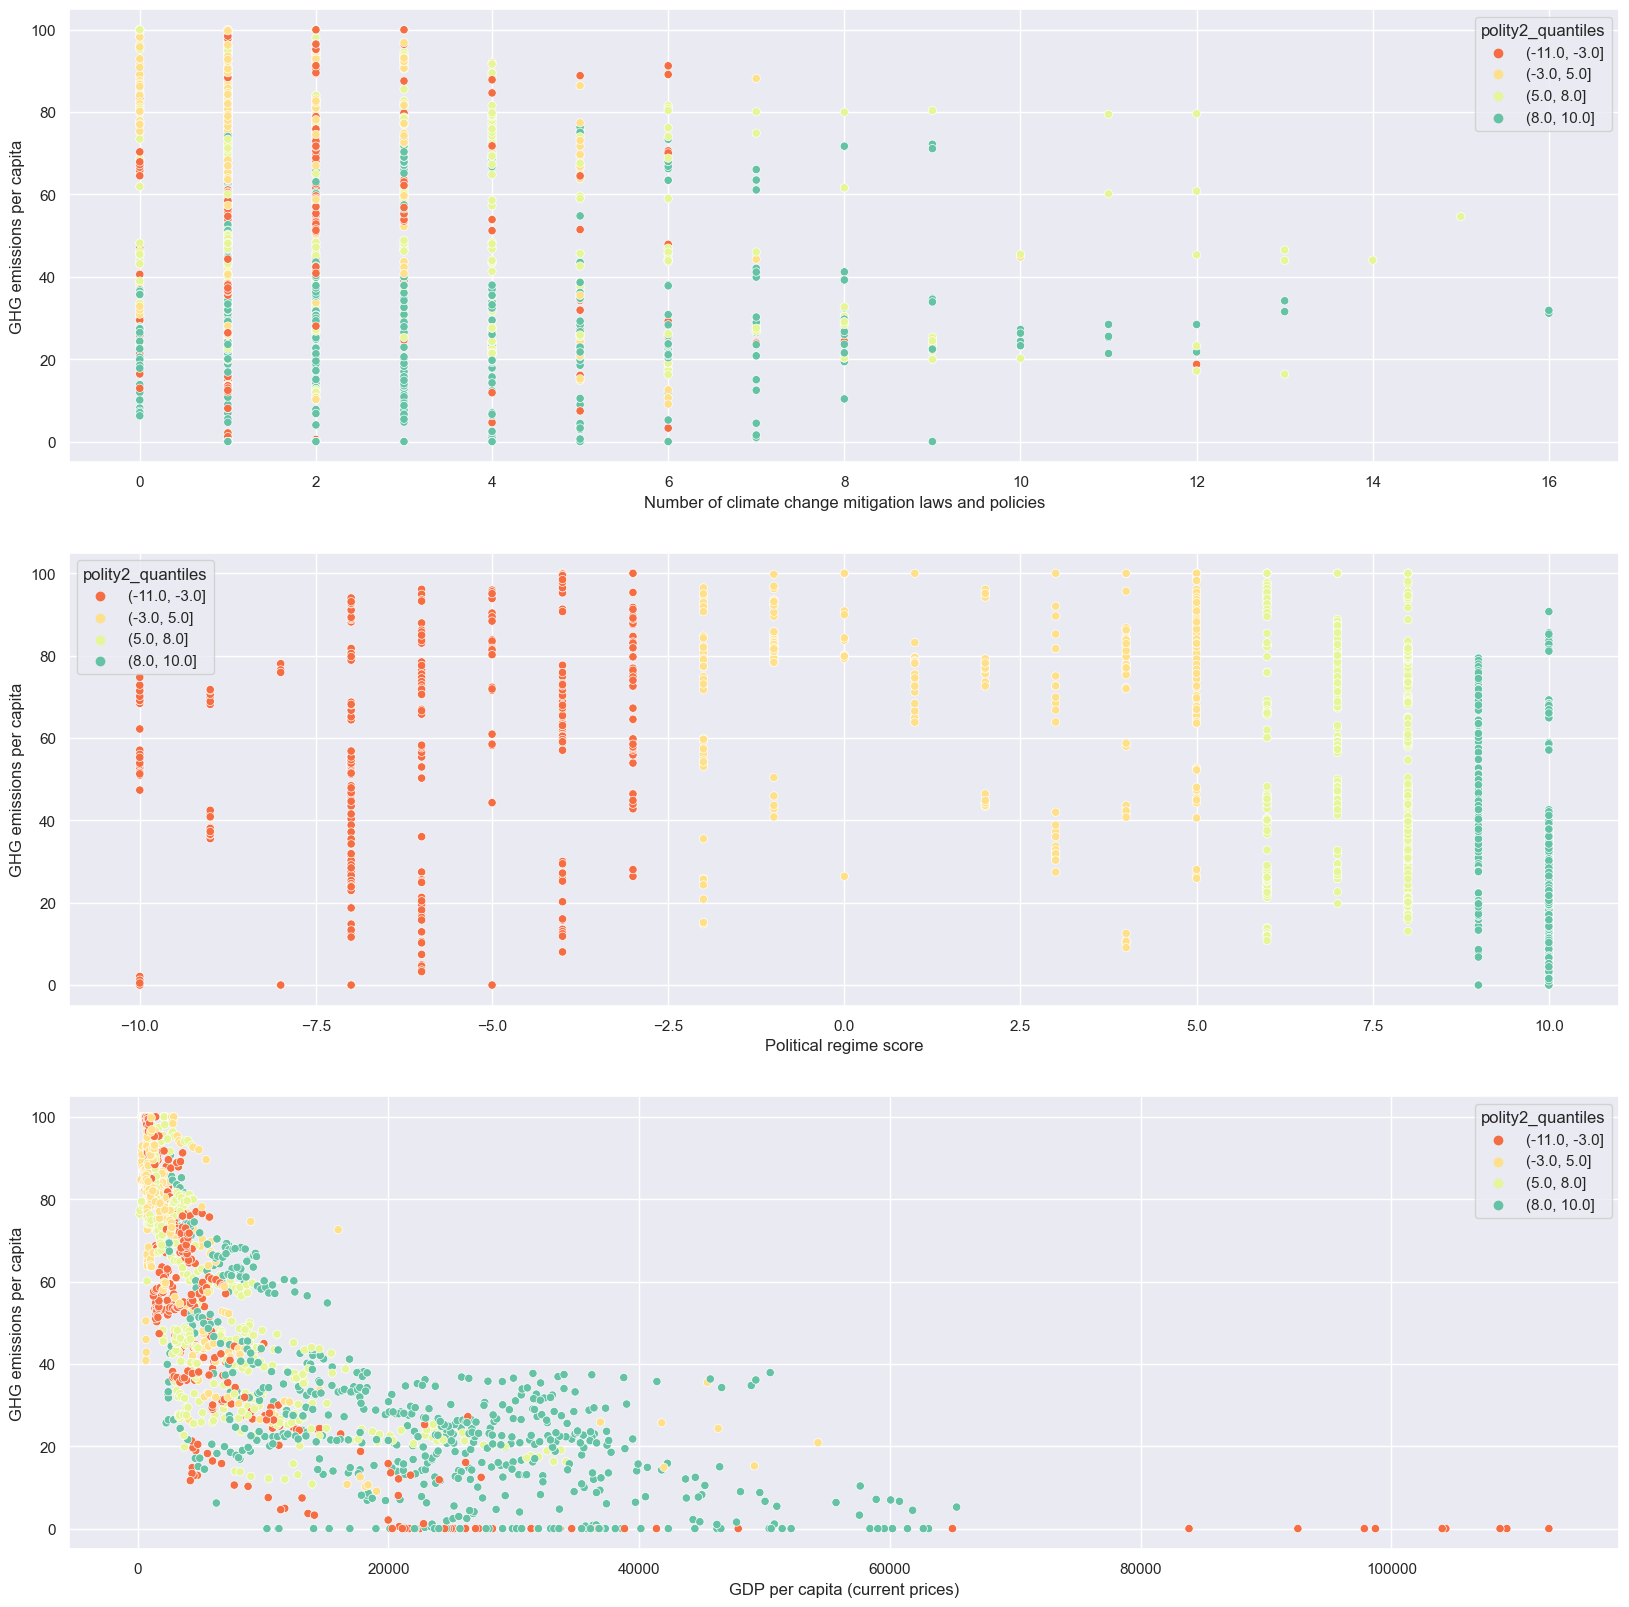

In [27]:
scatteplot_color_base('polity2_quantiles')

**Notes:**

1. The first graph (Total number of laws vs. GHG emissions per capita) might be percieved as another view of the third graph here. It, basically, depicts that **democratic countries (blue and green dots) pollute more than autocratic** eventhough they might have more green laws.
2. The second grapth (Political regime score vs. GHG emissions per capita) is useless since it color by laws that we also used as a variable for an X-axis.
3. The third graph (GDP per capita vs. GHG emissions per capita) shows that **states that close to the status of full democracy tend to have more GHG emissions per capita than autocratic countries** because all these blue dots are located below the red dots. 

##### c) GDP per capita (current prices)

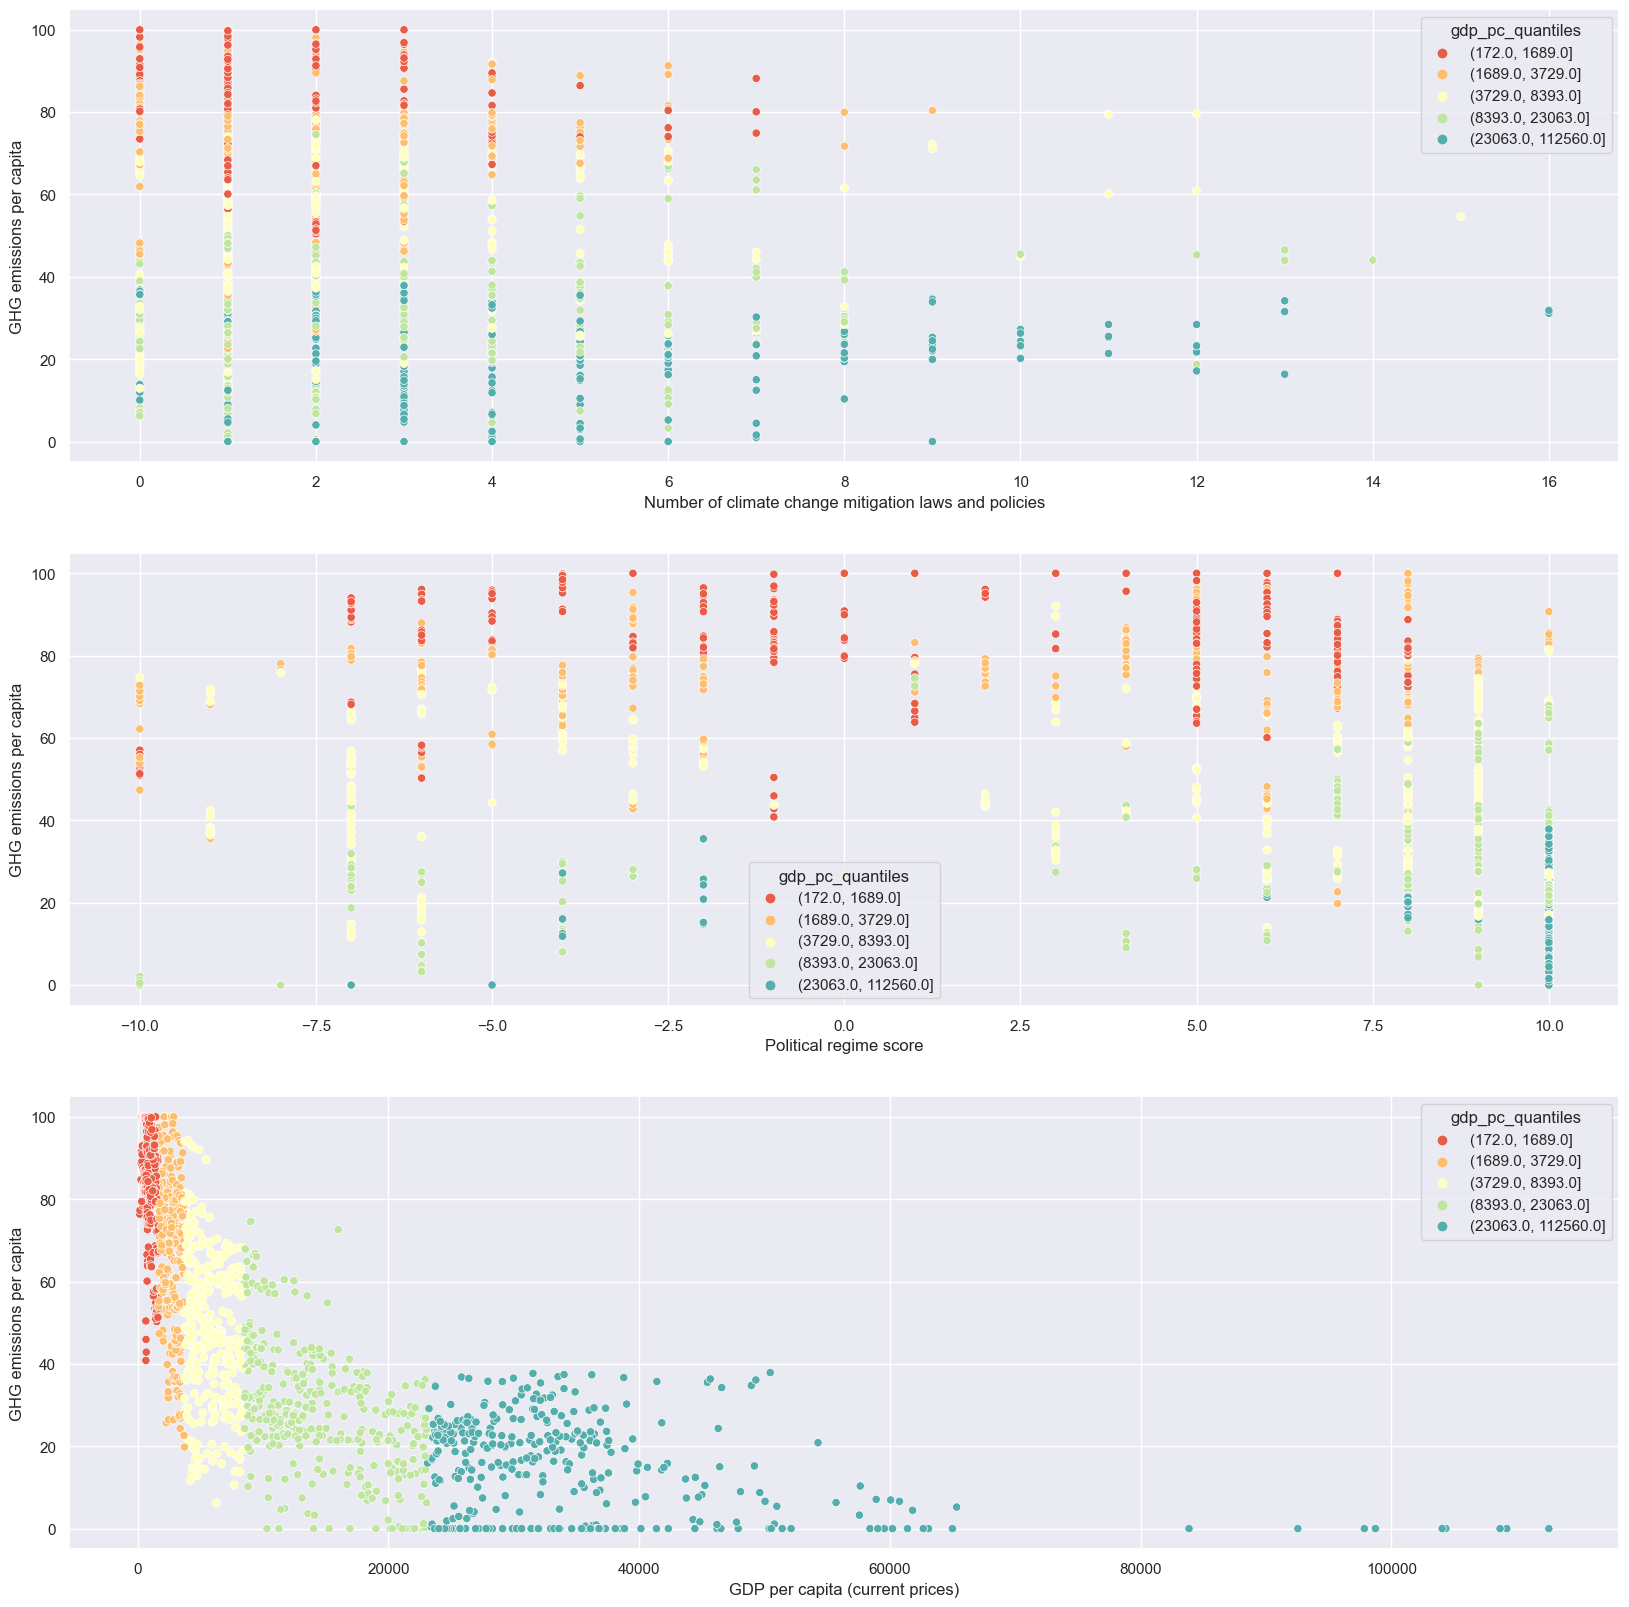

In [28]:
scatteplot_color_base('gdp_pc_quantiles')

**Notes:**

1. The first graph (Total number of laws vs. GHG emissions per capita) clearly shows us that **poor countries are located have no more than 7-9 green laws but still pollute much less** than other countries.
2. The second grapth (Political regime score vs. GHG emissions per capita) shows that **full democratic countries are welthier in average and, at the same time, pollute more than autocratic states**. Probably, poor countries emit less due to underdeveloped economies. 
3. The third graph (GDP per capita vs. GHG emissions per capita) is useless since it color by laws that we also used as a variable for an X-axis.

Let's check our assumptions via correlation matrix:

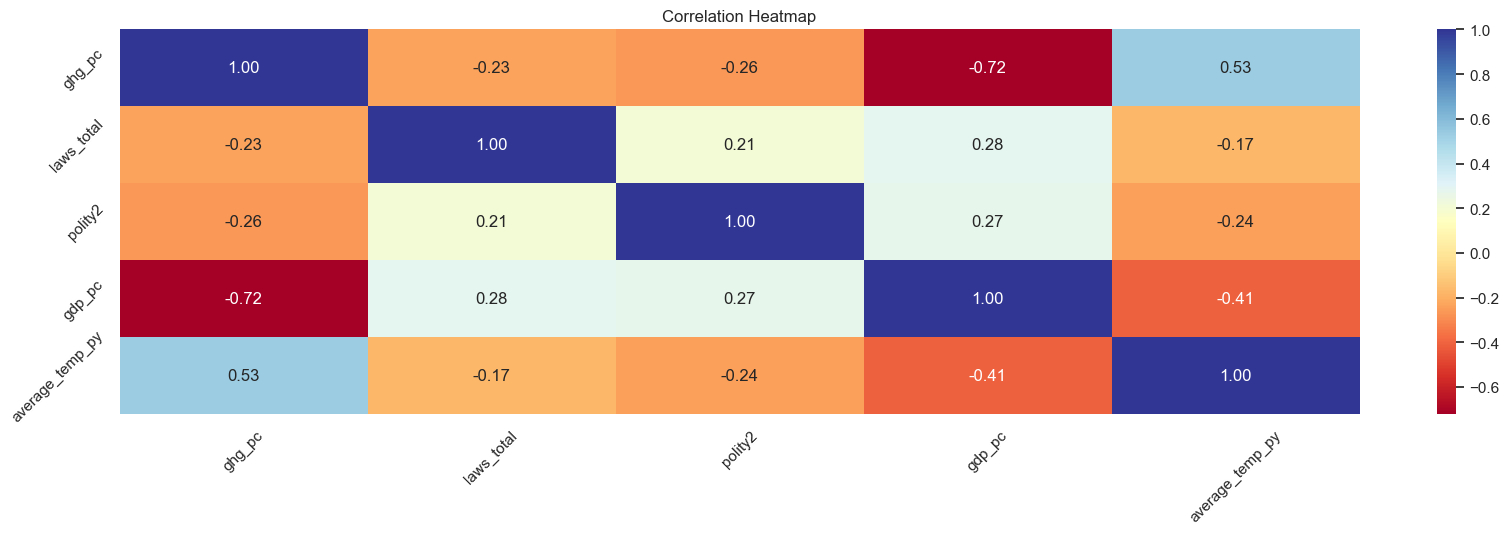

In [29]:
correlation = df[['ghg_pc', 'laws_total', 'polity2', 'gdp_pc', 'average_temp_py']].corr()

sns.heatmap(correlation, cmap="RdYlBu", annot=True, fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()

Ok! Our target variable (GHG emissions per capita) correlates with:
 1. GDP per capita (strong negative relationship: -0.72): **the poorer the country the less emissions it has**.
 2. Polity2 score (slight negative relationship: -0.26): **the more democratic the country the more emissions it has**.
 3. Number of green laws (slight negative relationship: -0.23): **the more laws are in place the more poluution country emit**.
 
<span style="color:red"> !!! It is significantly to mention here one more time: the value in vertical axis (GHG emissions per capita) we need to understand in a way that the higher the score - the better the country in terms of emissions (meaning, the less pollution it produce). </span> 

We also included he average annual temperature in this matrix because in the next steps we will use this feature as our control variable. So, it is quite important to understand how it is connected with other features.

4. Annual average temperature has a pretty strong positive correlation with our target variable (0.53) what makes sense: **the more we emit the higher the temperature will be afterwards**.

These were all codes regarding the scatterplots in our causality analysis.
To go back to the article click on one of the following links:

[Content](#content)

[Introduction](#introduction)

[Data Exploration](#data_exploration)

[Causality Analysis](#causal_analysis)

[Discussion](#discussion)

[Summary](#Summary)

#### Reverse Causality (Time Lag Analysis) <a class="anchor" id="timelag"></a>

If you want to jump back to the content of the article or to different sections in the Appendix, please click on one of the follwing links:
    
[Content](#content)

[Appendix: Import](#appendix1)

[Appendix: Data Exploration](#appendix2)

[Appendix: Causality Analysis](#appendix3)


In this step we are checking for reverse causality by trying to rule out the possibility of one variable affecting the other.
This we do by a time lag, which basically means we are shifting the results of our outcome variable *GHG emissions* by a specific amount of years. Depending on if we shift it forwards or backwards, we can then afterwards do a linear regression model of this and because we know the result is shifted based on the time difference there can only be a correlation in one direction and not the other, because for example laws made in 2015 cannot have an effect on emissions in 2013 or if shifted the other way around emissions of 2015 cannot have an effect on laws in 2013.

In our dataset we have many countries that only have data from later years onwards. This would mess with our dataframe right now as some countries will get associated with GHG emission values of other countries from completely different years.

To solve this problem we first take a look at the observation dataframe we created in our univariate analysis. Here we can see that especially in the early years there were not many countries collecting this data. From 2000 onwards we have at least 83 countries collecting this data, so I want to delete all countries from my dataset that only started the data collection from 2000 onwards.

To do this, I create a grouped dataframe, which takes in all countries, that have observations before the year 2000.
Out of this dataframe I then create a list of all these countries.

In [30]:
df_countries = df[df['year'] < 2000].groupby(['country']).size().reset_index(name='observations')

country_list = df_countries['country'].tolist()
country_list

['Algeria',
 'Argentina',
 'Armenia',
 'Austria',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Canada',
 'China',
 'Congo',
 'Costa Rica',
 'Cuba',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Denmark',
 'Djibouti',
 'Eritrea',
 'Eswatini',
 'Fiji',
 'Finland',
 'Germany',
 'Ghana',
 'Greece',
 'Guinea',
 'Honduras',
 'Hungary',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Luxembourg',
 'Malawi',
 'Mali',
 'Mexico',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Netherlands',
 'Nicaragua',
 'Niger',
 'Norway',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Philippines',
 'Poland',
 'Republic of Korea',
 'Singapore',
 'Solomon Islands',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Tajikistan',
 'Thailand',
 'Togo',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Republic of Tanzania',
 'United States of America',
 'Uzbekis

I now use this list, to create the dataframe I want to use for this analysis with only the countries with enough observations.

In [31]:
df_timelag = df[df['country'].isin(country_list)].copy()
df_timelag.reset_index()

level_0  index  country  year country_year     ghg_pc  laws_total  \
0           9    160  Algeria  1999        DZA99  42.804985           1   
1          10    161  Algeria  2000        DZA00  43.934949           1   
2          11    162  Algeria  2001        DZA01  46.499710           1   
3          12    163  Algeria  2002        DZA02  46.412504           1   
4          13    164  Algeria  2003        DZA03  44.842191           1   
...       ...    ...      ...   ...          ...        ...         ...   
1164     1715   9378   Zambia  2007        ZMB07  66.989888           2   
1165     1716   9379   Zambia  2008        ZMB08  67.292225           4   
1166     1717   9380   Zambia  2009        ZMB09  69.323288           4   
1167     1718   9381   Zambia  2010        ZMB10  67.606317           5   
1168     1719   9382   Zambia  2011        ZMB11  68.817045           6   

      laws_py  polity2  average_temp_py   gdp_pc laws_total_quantiles  \
0           1       -3        23.283333  3399.80          (-1.0, 1.0]   
1           0       -3        23.208333  3497.99          (-1.0, 1.0]   
2           0       -3        23.441667  3622.20          (-1.0, 1.0]   
3           0       -3        23.333333  3798.23          (-1.0, 1.0]   
4           0       -3        23.441667  4087.84          (-1.0, 1.0]   
...       ...      ...              ...      ...                  ...   
1164        1        5        22.200000  1628.14           (1.0, 2.0]   
1165        2        7        22.008333  1657.15           (2.0, 4.0]   
1166        0        7        22.258333  1810.42           (2.0, 4.0]   
1167        1        7        22.658333  1875.52          (4.0, 16.0]   
1168        1        7        21.991667  1916.79          (4.0, 16.0]   

     polity2_quantiles  gdp_pc_quantiles  
0        (-11.0, -3.0]  (1689.0, 3729.0]  
1        (-11.0, -3.0]  (1689.0, 3729.0]  
2        (-11.0, -3.0]  (1689.0, 3729.0]  
3        (-11.0, -3.0]  (3729.0, 8393.0]  
4        (-11.0, -3.0]  (3729.0, 8393.0]  
...                ...               ...  
1164       (-3.0, 5.0]   (172.0, 1689.0]  
1165        (5.0, 8.0]   (172.0, 1689.0]  
1166        (5.0, 8.0]  (1689.0, 3729.0]  
1167        (5.0, 8.0]  (1689.0, 3729.0]  
1168        (5.0, 8.0]  (1689.0, 3729.0]  

[1169 rows x 14 columns]

In the next step, we create a new column with the outcome variable *GHG emissions* to use it for the shifting. In this case we shift the rows by two, meaning that every GHG emission value from a given year will now be associated with the year two years later. So, for example emissions from 2005 are associated with laws of 2007, so only the emissions can have an effect on the laws but not vice versa (reverse causality).

In [32]:
df_timelag['ghg_time'] = df_timelag['ghg_pc'].shift(2)
df_timelag

index  country  year country_year     ghg_pc  laws_total  laws_py  \
9       160  Algeria  1999        DZA99  42.804985           1        1   
10      161  Algeria  2000        DZA00  43.934949           1        0   
11      162  Algeria  2001        DZA01  46.499710           1        0   
12      163  Algeria  2002        DZA02  46.412504           1        0   
13      164  Algeria  2003        DZA03  44.842191           1        0   
...     ...      ...   ...          ...        ...         ...      ...   
1715   9378   Zambia  2007        ZMB07  66.989888           2        1   
1716   9379   Zambia  2008        ZMB08  67.292225           4        2   
1717   9380   Zambia  2009        ZMB09  69.323288           4        0   
1718   9381   Zambia  2010        ZMB10  67.606317           5        1   
1719   9382   Zambia  2011        ZMB11  68.817045           6        1   

      polity2  average_temp_py   gdp_pc laws_total_quantiles  \
9          -3        23.283333  3399.80          (-1.0, 1.0]   
10         -3        23.208333  3497.99          (-1.0, 1.0]   
11         -3        23.441667  3622.20          (-1.0, 1.0]   
12         -3        23.333333  3798.23          (-1.0, 1.0]   
13         -3        23.441667  4087.84          (-1.0, 1.0]   
...       ...              ...      ...                  ...   
1715        5        22.200000  1628.14           (1.0, 2.0]   
1716        7        22.008333  1657.15           (2.0, 4.0]   
1717        7        22.258333  1810.42           (2.0, 4.0]   
1718        7        22.658333  1875.52          (4.0, 16.0]   
1719        7        21.991667  1916.79          (4.0, 16.0]   

     polity2_quantiles  gdp_pc_quantiles   ghg_time  
9        (-11.0, -3.0]  (1689.0, 3729.0]        NaN  
10       (-11.0, -3.0]  (1689.0, 3729.0]        NaN  
11       (-11.0, -3.0]  (1689.0, 3729.0]  42.804985  
12       (-11.0, -3.0]  (3729.0, 8393.0]  43.934949  
13       (-11.0, -3.0]  (3729.0, 8393.0]  46.499710  
...                ...               ...        ...  
1715       (-3.0, 5.0]   (172.0, 1689.0]  63.604503  
1716        (5.0, 8.0]   (172.0, 1689.0]  66.978513  
1717        (5.0, 8.0]  (1689.0, 3729.0]  66.989888  
1718        (5.0, 8.0]  (1689.0, 3729.0]  67.292225  
1719        (5.0, 8.0]  (1689.0, 3729.0]  69.323288  

[1169 rows x 14 columns]

In our dataset we now have for the first two years (1999 and 2000) wrong values for all countries, because they get the last year values of the countries prior in their list. Therefore, to have a clean and reliable dataset, we have to remove all years before 2001 (which includes the wrong values for 1999 and 2000 but also accounts for the wrong values of the countries, who collected data even before 1999).

In [33]:
df_timelag.drop(df_timelag.loc[df_timelag['year']<2001].index, inplace=True)
df_timelag

index  country  year country_year     ghg_pc  laws_total  laws_py  \
11      162  Algeria  2001        DZA01  46.499710           1        0   
12      163  Algeria  2002        DZA02  46.412504           1        0   
13      164  Algeria  2003        DZA03  44.842191           1        0   
14      165  Algeria  2004        DZA04  46.420352           3        2   
15      166  Algeria  2005        DZA05  43.375336           5        2   
...     ...      ...   ...          ...        ...         ...      ...   
1715   9378   Zambia  2007        ZMB07  66.989888           2        1   
1716   9379   Zambia  2008        ZMB08  67.292225           4        2   
1717   9380   Zambia  2009        ZMB09  69.323288           4        0   
1718   9381   Zambia  2010        ZMB10  67.606317           5        1   
1719   9382   Zambia  2011        ZMB11  68.817045           6        1   

      polity2  average_temp_py   gdp_pc laws_total_quantiles  \
11         -3        23.441667  3622.20          (-1.0, 1.0]   
12         -3        23.333333  3798.23          (-1.0, 1.0]   
13         -3        23.441667  4087.84          (-1.0, 1.0]   
14          2        23.191667  4356.99           (2.0, 4.0]   
15          2        23.166667  4663.59          (4.0, 16.0]   
...       ...              ...      ...                  ...   
1715        5        22.200000  1628.14           (1.0, 2.0]   
1716        7        22.008333  1657.15           (2.0, 4.0]   
1717        7        22.258333  1810.42           (2.0, 4.0]   
1718        7        22.658333  1875.52          (4.0, 16.0]   
1719        7        21.991667  1916.79          (4.0, 16.0]   

     polity2_quantiles  gdp_pc_quantiles   ghg_time  
11       (-11.0, -3.0]  (1689.0, 3729.0]  42.804985  
12       (-11.0, -3.0]  (3729.0, 8393.0]  43.934949  
13       (-11.0, -3.0]  (3729.0, 8393.0]  46.499710  
14         (-3.0, 5.0]  (3729.0, 8393.0]  46.412504  
15         (-3.0, 5.0]  (3729.0, 8393.0]  44.842191  
...                ...               ...        ...  
1715       (-3.0, 5.0]   (172.0, 1689.0]  63.604503  
1716        (5.0, 8.0]   (172.0, 1689.0]  66.978513  
1717        (5.0, 8.0]  (1689.0, 3729.0]  66.989888  
1718        (5.0, 8.0]  (1689.0, 3729.0]  67.292225  
1719        (5.0, 8.0]  (1689.0, 3729.0]  69.323288  

[806 rows x 14 columns]

We do the same steps as before with a new column for a shift in the other direction. So, now emissions from 2005 as in our previous example are associated with laws from 2003, so the laws can influence the emissions, but not vice versa.

In [34]:
df_timelag['ghg_time2'] = df_timelag['ghg_pc'].shift(-2)
df_timelag.drop(df_timelag.loc[df_timelag['year']>2009].index, inplace=True)
df_timelag

index  country  year country_year     ghg_pc  laws_total  laws_py  \
11      162  Algeria  2001        DZA01  46.499710           1        0   
12      163  Algeria  2002        DZA02  46.412504           1        0   
13      164  Algeria  2003        DZA03  44.842191           1        0   
14      165  Algeria  2004        DZA04  46.420352           3        2   
15      166  Algeria  2005        DZA05  43.375336           5        2   
...     ...      ...   ...          ...        ...         ...      ...   
1713   9376   Zambia  2005        ZMB05  63.604503           1        0   
1714   9377   Zambia  2006        ZMB06  66.978513           1        0   
1715   9378   Zambia  2007        ZMB07  66.989888           2        1   
1716   9379   Zambia  2008        ZMB08  67.292225           4        2   
1717   9380   Zambia  2009        ZMB09  69.323288           4        0   

      polity2  average_temp_py   gdp_pc laws_total_quantiles  \
11         -3        23.441667  3622.20          (-1.0, 1.0]   
12         -3        23.333333  3798.23          (-1.0, 1.0]   
13         -3        23.441667  4087.84          (-1.0, 1.0]   
14          2        23.191667  4356.99           (2.0, 4.0]   
15          2        23.166667  4663.59          (4.0, 16.0]   
...       ...              ...      ...                  ...   
1713        5        23.233333  1098.62          (-1.0, 1.0]   
1714        5        22.108333  1233.88          (-1.0, 1.0]   
1715        5        22.200000  1628.14           (1.0, 2.0]   
1716        7        22.008333  1657.15           (2.0, 4.0]   
1717        7        22.258333  1810.42           (2.0, 4.0]   

     polity2_quantiles  gdp_pc_quantiles   ghg_time  ghg_time2  
11       (-11.0, -3.0]  (1689.0, 3729.0]  42.804985  44.842191  
12       (-11.0, -3.0]  (3729.0, 8393.0]  43.934949  46.420352  
13       (-11.0, -3.0]  (3729.0, 8393.0]  46.499710  43.375336  
14         (-3.0, 5.0]  (3729.0, 8393.0]  46.412504  44.316132  
15         (-3.0, 5.0]  (3729.0, 8393.0]  44.842191  43.958663  
...                ...               ...        ...        ...  
1713       (-3.0, 5.0]   (172.0, 1689.0]  63.584225  66.989888  
1714       (-3.0, 5.0]   (172.0, 1689.0]  64.033146  67.292225  
1715       (-3.0, 5.0]   (172.0, 1689.0]  63.604503  69.323288  
1716        (5.0, 8.0]   (172.0, 1689.0]  66.978513  67.606317  
1717        (5.0, 8.0]  (1689.0, 3729.0]  66.989888  68.817045  

[660 rows x 15 columns]

Now we can use scatterplots to visualise both correlations and see if we can spot differences:

Firstly, just to check if we can already see a difference we plot both GHG emissions on a timeline (also just for potential observations we did not consider before, we also plot the laws over a time axis):

Text(0, 0.5, 'GHG Emissions')

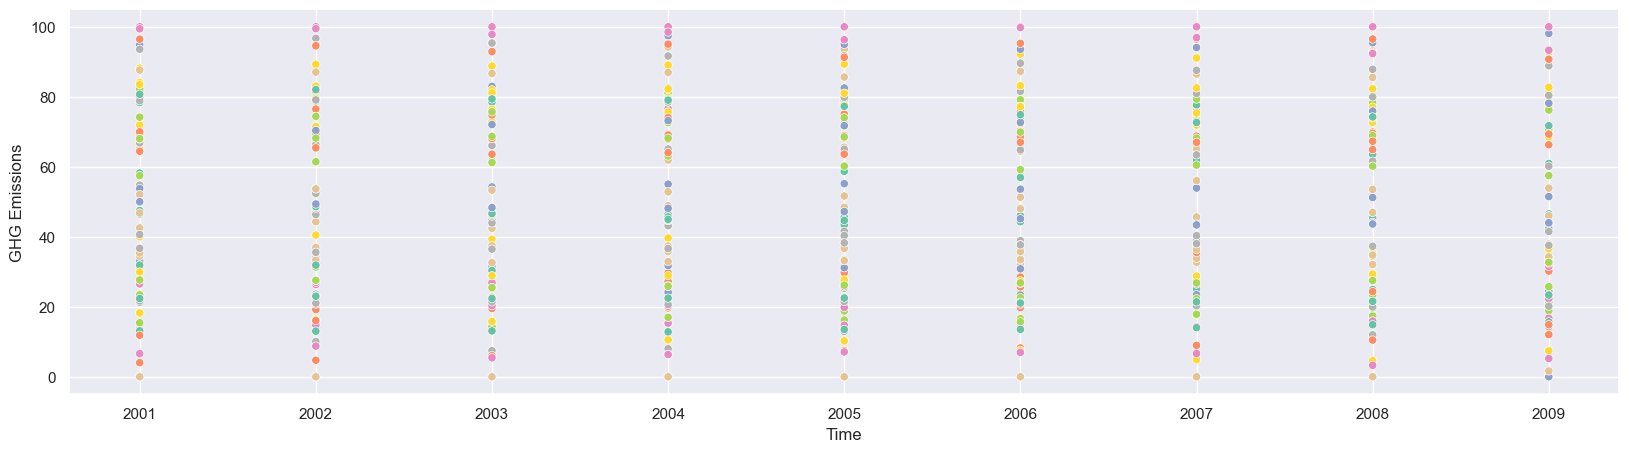

In [35]:
sns.scatterplot(x=time, y=ghg_pc, legend=False, hue='country', palette='Set2', data=df_timelag)
plt.xlabel(f'Time')
plt.ylabel(f'GHG Emissions')

Text(0, 0.5, 'GHG Emissions')

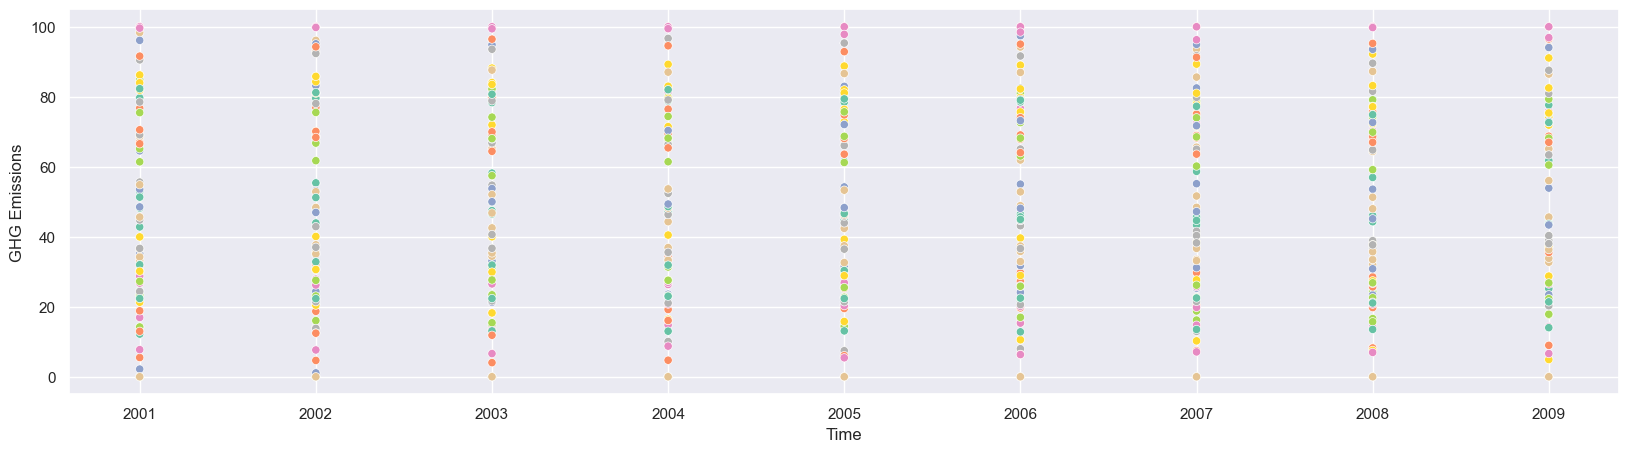

In [36]:
sns.scatterplot(x=time, y=ghg_time, legend=False, hue='country', palette='Set2', data=df_timelag)
plt.xlabel(f'Time')
plt.ylabel(f'GHG Emissions')

Text(0, 0.5, 'GHG Emissions')

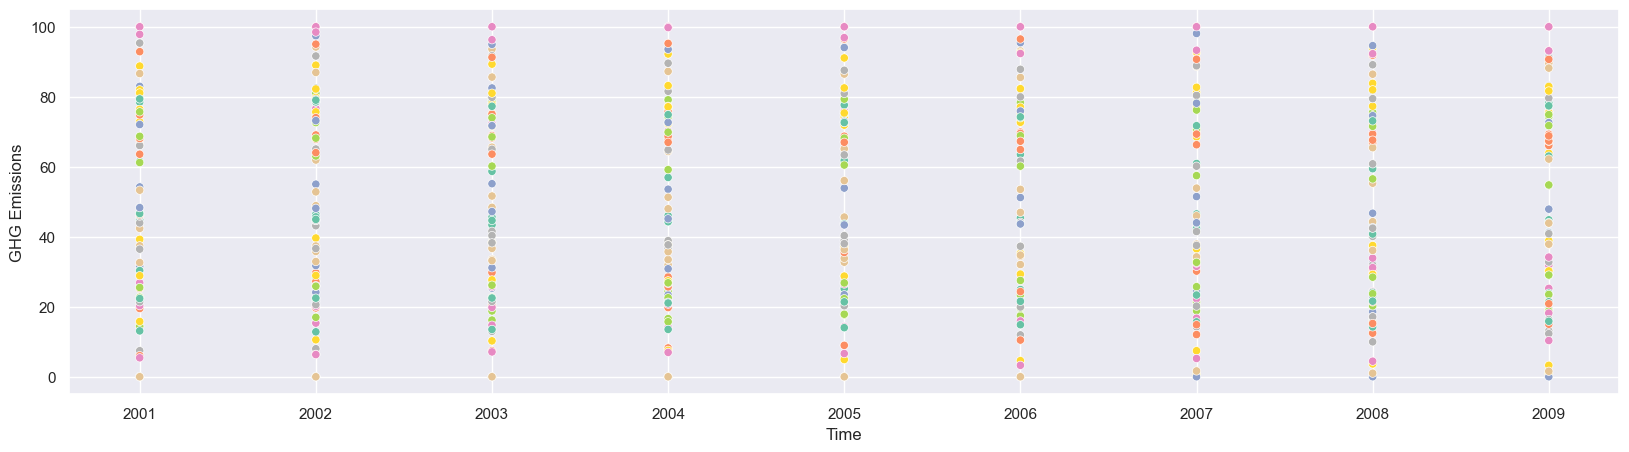

In [37]:
sns.scatterplot(x=time, y=ghg_time2, legend=False, hue='country', palette='Set2', data=df_timelag)
plt.xlabel(f'Time')
plt.ylabel(f'GHG Emissions')

Text(0, 0.5, 'Total Laws')

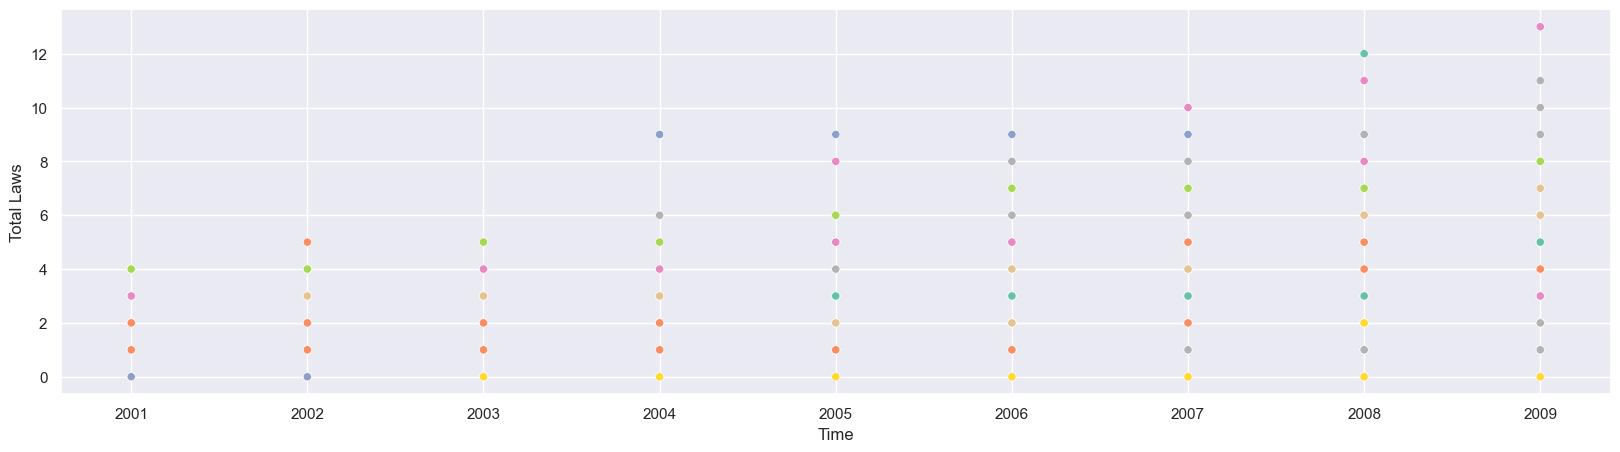

In [38]:
sns.scatterplot(x=time, y=exp_feature_1, legend=False, hue='country', palette='Set2', data=df_timelag)
plt.xlabel(f'Time')
plt.ylabel(f'Total Laws')

**Observations:**

Next, we want to visually look at differences between both correlation directions, so we plot for both time shifts the correlation between laws and emissions:

Text(0, 0.5, 'GHG Emissions')

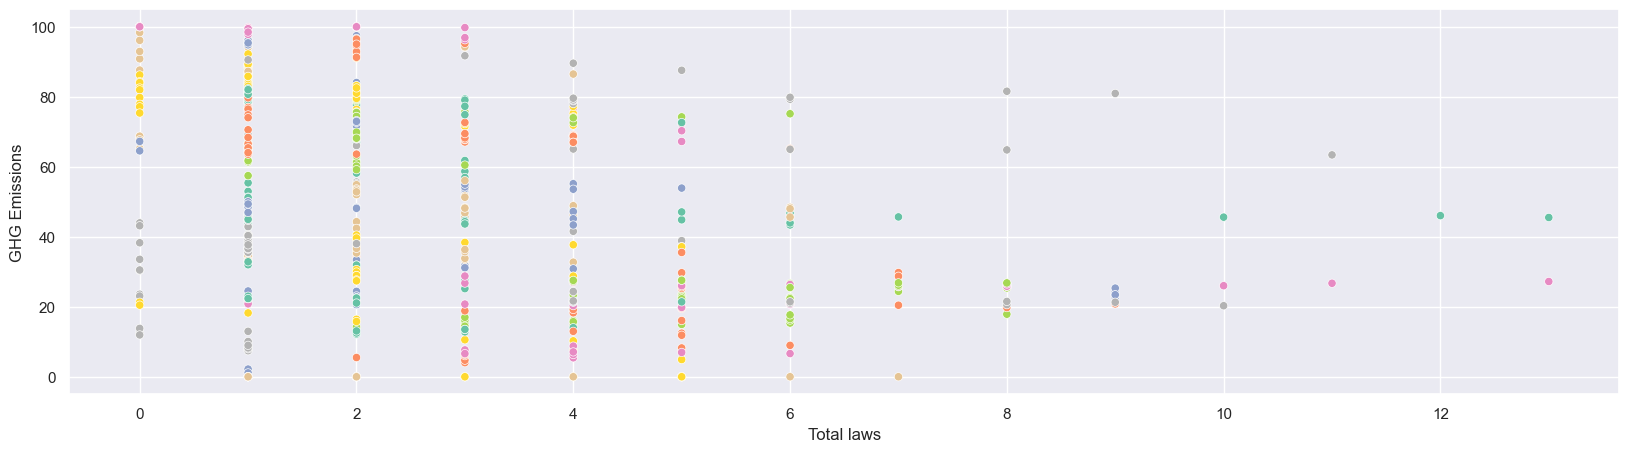

In [39]:
sns.scatterplot(x=exp_feature_1, y=ghg_time, legend=False, hue='country', palette='Set2', data=df_timelag)
plt.xlabel(f'Total laws')
plt.ylabel(f'GHG Emissions')

Text(0, 0.5, 'GHG Emissions')

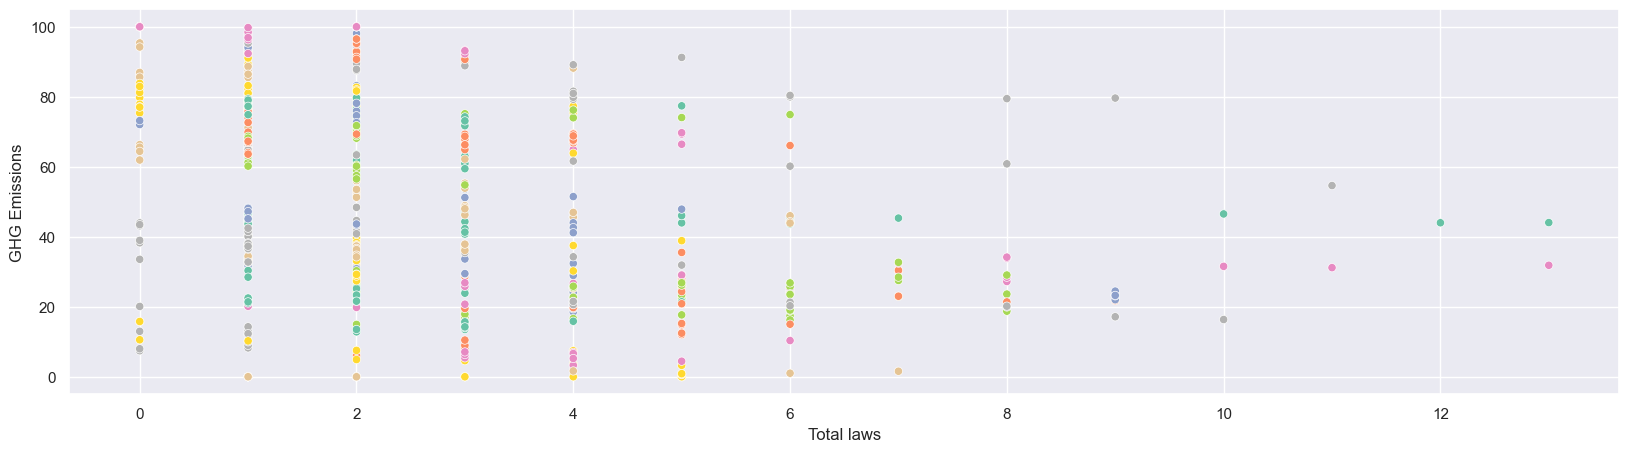

In [40]:
sns.scatterplot(x=exp_feature_1, y=ghg_time2, legend=False, hue='country', palette='Set2', data=df_timelag)
plt.xlabel(f'Total laws')
plt.ylabel(f'GHG Emissions')

Visually it seems like there is no big difference, but we will also insert a linear regression line to see if we can observe a difference in this line:

<Axes: xlabel='laws_total', ylabel='ghg_time'>

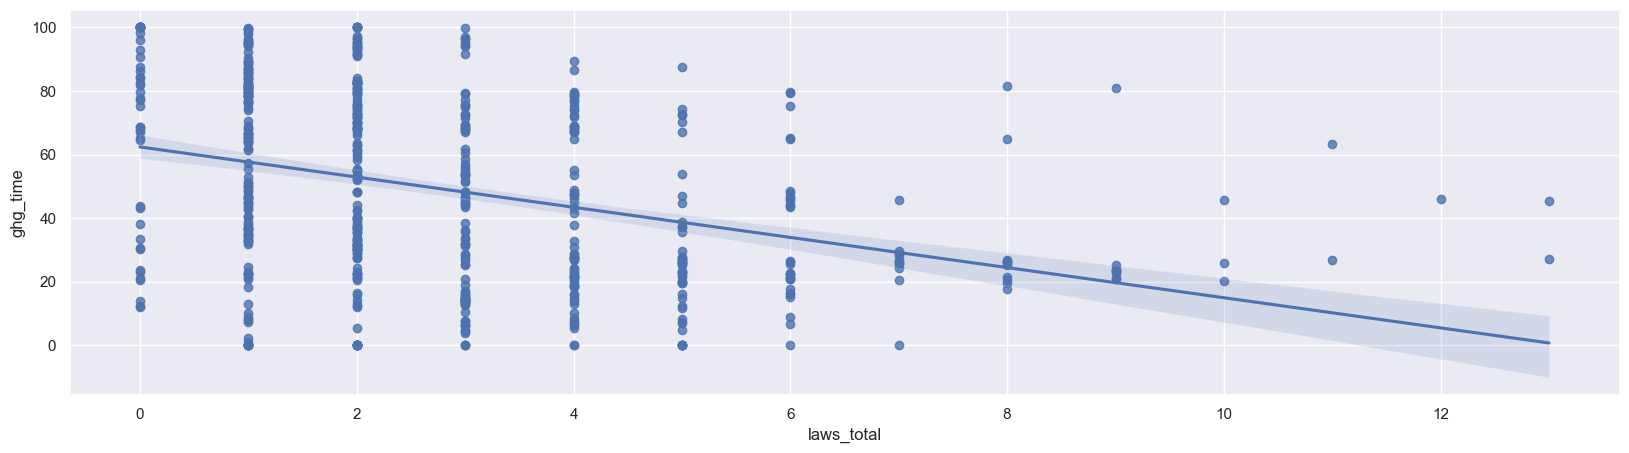

In [41]:
sns.regplot(x=exp_feature_1, y=ghg_time, data=df_timelag)

<Axes: xlabel='laws_total', ylabel='ghg_time2'>

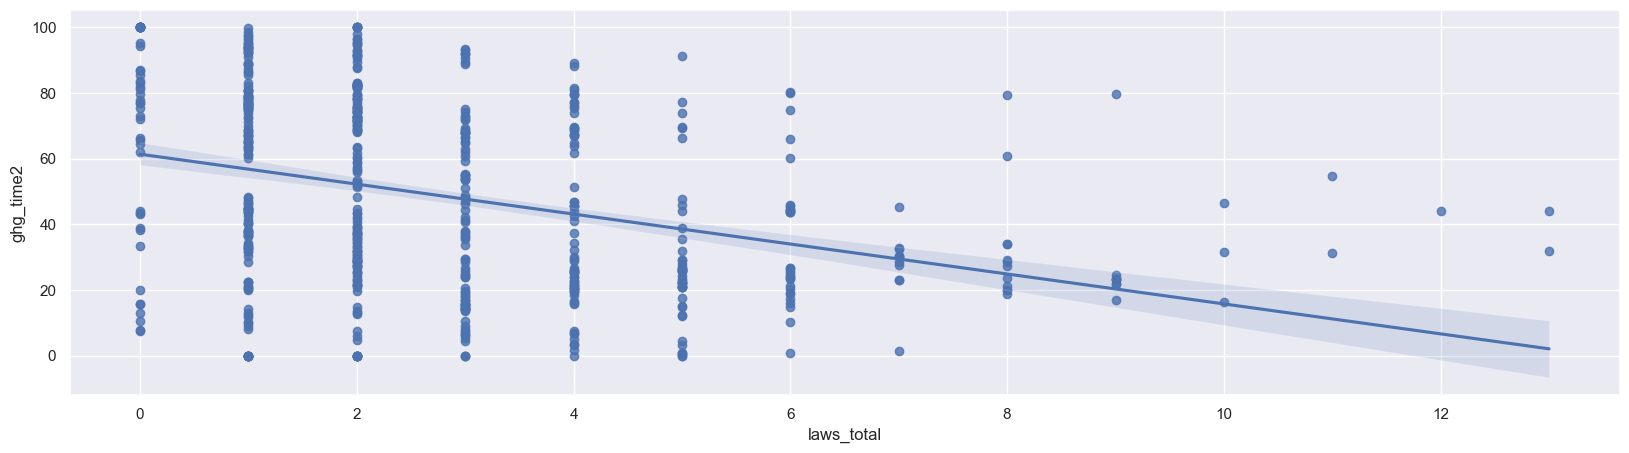

In [42]:
sns.regplot(x=exp_feature_1, y=ghg_time2, data=df_timelag)

Also, here again we do not visually see a big difference between the two graphs. In the next steps we would quantify a potential small difference with a linear regression model, but this would get rather complicated to define reliable quantified data here that can explain a "stronger" correlation direction. In general it seems here that we definitely have an issue with inverse causality and it seems very difficult to rule this possibility out.

One way of seeing maybe stronger effects would be to increase the time span. We were considering using 5 years to see very clear effects, but this would reduce our dataset by 5 years in both directions, which would decrease it to only a couple of years of observations, which is not very precise and reliable then anymore.

However, for finding other interesting insights we were checking for differences in different years or countries. This is interesting for explorative analysis and more specific cases of countries, but does not help with the overall aim of this paper, which is why we do not go more in depth about this here.
However, if you want to explore it for yourself you can simply adapt the country names or the years in this code to plot the graphs for yourself and see if you find interesting differences in specific cases:

Text(0, 0.5, 'GHG Emissions')

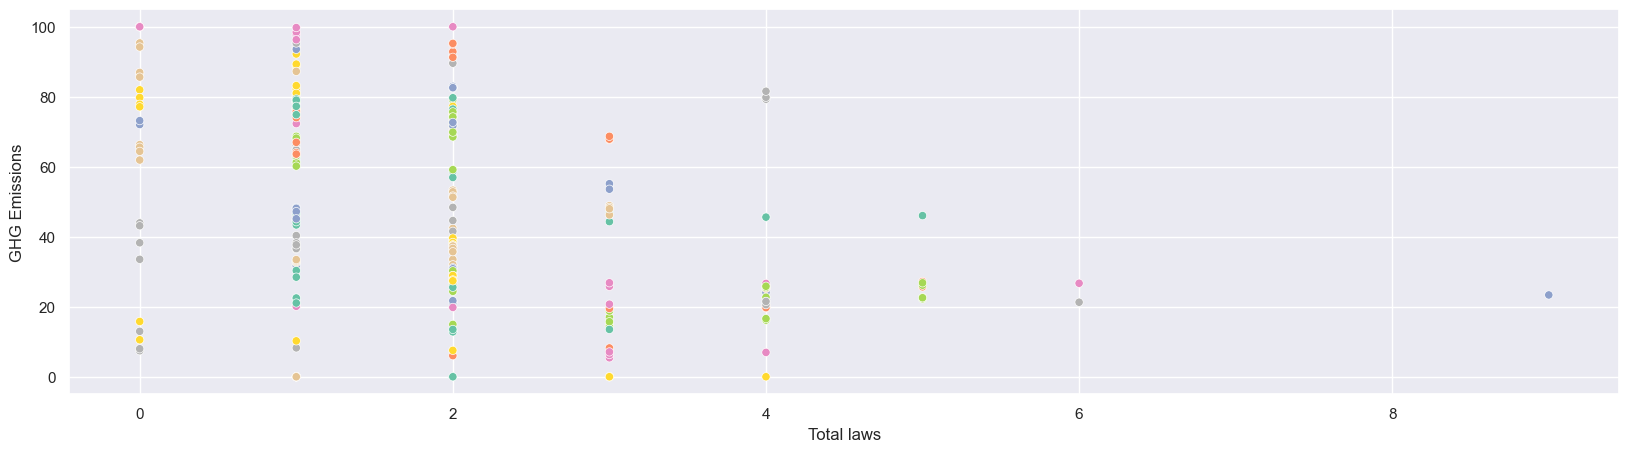

In [43]:
#Change the observed years (here it is everything before 2005)
sns.scatterplot(x=exp_feature_1, y=ghg_time2, legend=False, hue='country', palette='Set2', data=df_timelag[df_timelag['year']<2005])
plt.xlabel(f'Total laws')
plt.ylabel(f'GHG Emissions')

Text(0, 0.5, 'GHG Emissions')

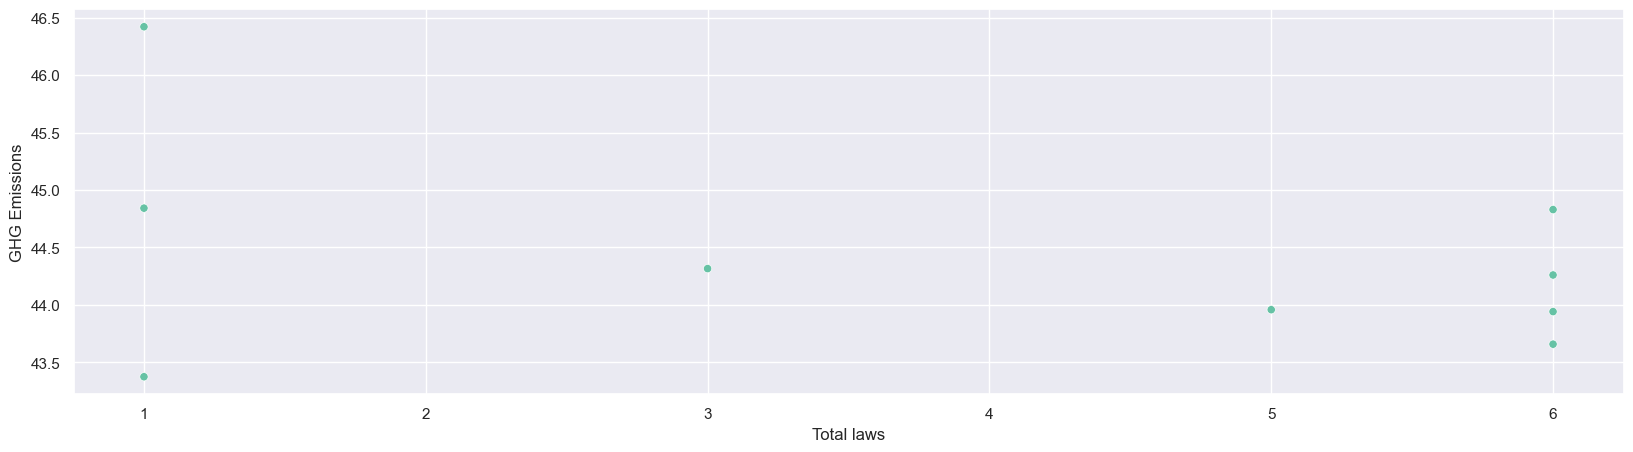

In [44]:
#Change the observed country (here it is Algeria)
sns.scatterplot(x=exp_feature_1, y=ghg_time2, legend=False, hue='country', palette='Set2', data=df_timelag[df_timelag['country']=='Algeria'])
plt.xlabel(f'Total laws')
plt.ylabel(f'GHG Emissions')

Text(0, 0.5, 'GHG Emissions')

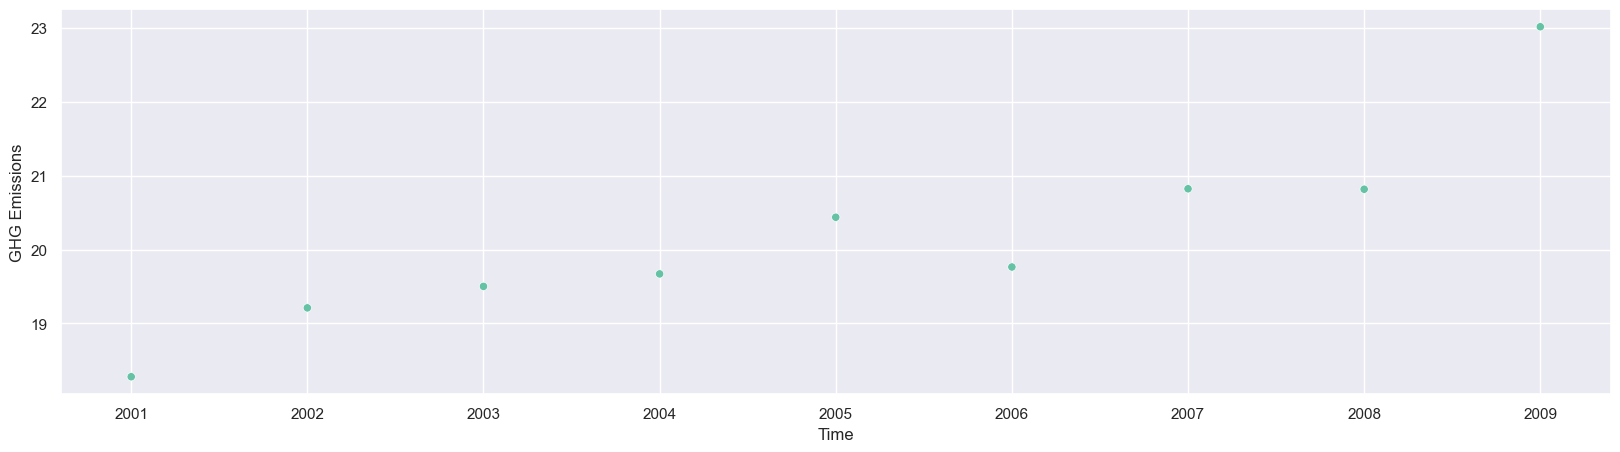

In [45]:
#For observing different time developments in countries or years use this code and adapt it depending on your needs with the help of the two previous codes
sns.scatterplot(x=time, y=ghg_pc, legend=False, hue='country', palette='Set2', data=df_timelag[df_timelag['country']=='Germany'])
plt.xlabel(f'Time')
plt.ylabel(f'GHG Emissions')

These were all codes regarding the time lag approach in our causality analysis.
To go back to the article click on one of the following links:

[Content](#content)

[Introduction](#introduction)

[Data Exploration](#data_exploration)

[Causality Analysis](#causal_analysis)

[Discussion](#discussion)

[Summary](#Summary)

#### Difference-in-Difference<a class="anchor" id="diffindiffapp"></a>

If you want to jump back to the content of the article or to different sections in the Appendix, please click on one of the follwing links:
    
[Content](#content)

[Appendix: Import](#appendix1)

[Appendix: Data Exploration](#appendix2)

[Appendix: Causality Analysis](#appendix3)

So, if we want to estimate the effect of a treatment (in our case the treatment = adoption of a new green law) on an outcome of interest (GHG emissions per capita) we need to apply Difference-in-Difference (Diff-in-Diff or DiD) method.

However, in our analysis we have one limitation concerning DiD. One key assumption of the Diff-in-Diff method is that the two groups being compared should be similar in all relevant aspects except for the treatment. In our case we cannot be sure about that since countries in EU zone and other countries around the globe can be distinguishes by economies scale, population scale, cultural aspect, etc.

Despite of this limitations we will try to apply this method in order to check our intuition and reasoning.

Since the time span for our subset is from 1995 to 2011, **we need to find shock event that ideally happend between 2000 - 2005.**

Below there is the list of possible events:

   - [The Marrakesh Accords](https://www.un-redd.org/glossary/marrakesh-accords) are adopted at COP7, detailing the rules for the implementation of the Kyoto Protocol, setting up new funding and planning instruments for adaptation, and establishing a technology transfer framework to support developing countries in addressing climate change (November, 2001)
   - [Johannesburg Declaration on Sustainable Development](https://www.un.org/esa/sustdev/documents/WSSD_POI_PD/English/POI_PD.htm) (2002) -> 190 countries adopted
   - [The EU's Emissions Trading System is launched](https://www.europarl.europa.eu/news/en/headlines/society/20170213STO62208/the-eu-emissions-trading-scheme-ets-and-its-reform-in-brief), the world's first and largest emissions trading scheme, is launched as a major pillar of EU climate policy. (January, 2005) -> 30 countries: the 27 EU member states + Iceland, Liechtenstein and Norway
   - [Kyoto protocol](https://unfccc.int/kyoto_protocol) (February, 2005) -> 192 countries
    
However, it seems that it would be easier to separate countries into treatment and control with the use of EU's Emissions Trading System. So, let's work with it. Let's first create a dummy variable that would indicate the membership status of ETS: 'ETS_membership'.

In [46]:
df['ETS_membership'] = 1

In [47]:
ETS_members = ['Austria', 'Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Finland', 'Germany', 'Greece', 
                'Hungary', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 
                'Slovakia', 'Spain', 'Sweden', 'United Kingdom of Great Britain and Northern Ireland',]

for i, row in df.iterrows():
    if row["country"] in ETS_members:
        df.at[i, "ETS_members"] = 1
    else:
        df.at[i, "ETS_members"] = 0

In [48]:
df_mean_ghg_pc = df.groupby(['year', 'ETS_members'])['ghg_pc'].agg(['mean'])
df_mean_ghg_pc.reset_index(inplace=True)
df_mean_ghg_pc

year  ETS_members       mean
0   1995          0.0  53.905686
1   1995          1.0  19.236621
2   1996          0.0  55.609385
3   1996          1.0  20.559151
4   1997          0.0  56.452253
5   1997          1.0  19.200600
6   1998          0.0  58.119489
7   1998          1.0  20.267220
8   1999          0.0  58.526229
9   1999          1.0  19.289895
10  2000          0.0  57.031341
11  2000          1.0  19.888768
12  2001          0.0  57.367338
13  2001          1.0  19.863952
14  2002          0.0  56.201516
15  2002          1.0  19.846478
16  2003          0.0  57.027463
17  2003          1.0  19.311912
18  2004          0.0  57.513850
19  2004          1.0  19.607935
20  2005          0.0  57.713947
21  2005          1.0  19.976615
22  2006          0.0  56.729662
23  2006          1.0  19.759843
24  2007          0.0  55.578087
25  2007          1.0  20.289175
26  2008          0.0  54.544349
27  2008          1.0  20.918787
28  2009          0.0  55.209875
29  2009          1.0  22.791430
30  2010          0.0  54.289269
31  2010          1.0  21.643909
32  2011          0.0  55.051278
33  2011          1.0  22.897359

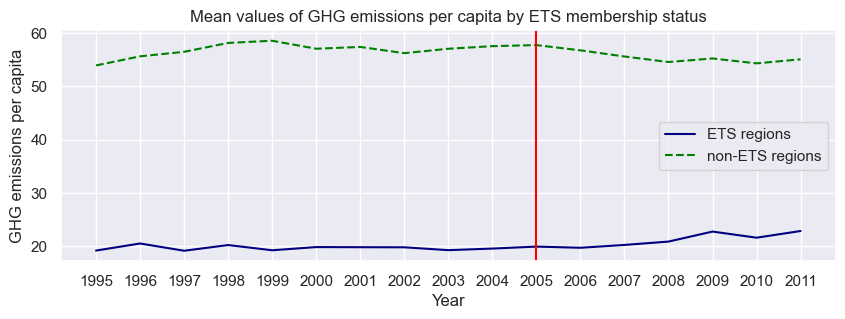

In [49]:
plt.figure(figsize=(10, 3))

plt.plot(df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 1)]['year'],
         df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 1)]['mean'],
         color = "navy", linestyle = '-', label = "ETS regions")

plt.plot(df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 0)]['year'],
         df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 0)]['mean'],
         color = "green", linestyle = '--', label = "non-ETS regions")

plt.axvline(x=2005, ymin=0, ymax=100, color='red')
plt.legend()
plt.xlabel("Year")
plt.ylabel(target_feature_name)
plt.title(f"Mean values of {target_feature_name} by ETS membership status")
plt.xticks(df["year"].unique())

plt.show()

**Notes:** This graph shows the dynamics of mean values of GHG emissions per capita for countries with ETS status (blue line) and those that are not included in ETS programm (green line). The vertical red line separates the timeline in pre- and post- ETS periods. 

1. **ETS regions**: the values of mean GHG emissions per capita were pretty stable in the pre-ETS period, while after introducing that system it slightly increased (eventhough we expected the opposite effect).
2. **non-ETS regions**: before ETS the mean values of GHG emissions per capita fluctuated a bit but after implementation of ETS it came back to the level of 1995 (approximately).
3. We should take into account that 2005 was also a year of Kyoto Protocol development. That's why we might observe that slight fall after 2005 for non-ETS countries. To check the general effect we will try to apply further the Parallel test.

**The Parallel Test** states that the control group (non-ETS regions) and the treatment group (ETS regions) would have experienced the same trend in the outcome of interest if the treatment had not been implemented. In other words, both groups would have followed the same trajectory over time, in the absence of the treatment. 


First, we need to create two separate subsets of control and treatment groups before and after treatment:

In [50]:
# subsets BEFORE the treatment
df_before_treatment_ets = df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 1) & 
                                         (df_mean_ghg_pc['year'] < 2005)]
df_before_treatment_non_ets = df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 0) & 
                                             (df_mean_ghg_pc['year'] < 2005)]

# subsets AFTER the treatment
df_after_treatment_ets = df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 1) & 
                                        (df_mean_ghg_pc['year'] >= 2005)]
df_after_treatment_non_ets = df_mean_ghg_pc[(df_mean_ghg_pc['ETS_members'] == 0) & 
                                            (df_mean_ghg_pc['year'] >= 2005)]

Now, we can fit a linear regression model to our subsets and calculate the difference between their slopes:

In [51]:
# linreg for treated group BEFORE the treatment
X_ets = df_before_treatment_ets[['year']]
y_ets = df_before_treatment_ets['mean']
model_ets_before = LinearRegression().fit(X_ets, y_ets)

# linreg for control group BEFORE the treatment
X_non_ets = df_before_treatment_non_ets[['year']]
y_non_ets = df_before_treatment_non_ets['mean']
model_non_ets_before = LinearRegression().fit(X_non_ets, y_non_ets)

# slopes difference BEFORE the treatment
difference_in_trends_before_treatment = model_ets_before.coef_[0] - model_non_ets_before.coef_[0]

# Test the statistical significance of the difference in the trends using a t-test
t_stat, p_value = ttest_ind(model_ets_before.predict(X_ets), model_non_ets_before.predict(X_non_ets))

print(f"coefficient of model_ets_before:     {model_ets_before.coef_[0]}")
print(f"coefficient of model_non_ets_before: {model_non_ets_before.coef_[0]}")
print(f"difference in slopes:                {difference_in_trends_before_treatment}")
print()
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

coefficient of model_ets_before:     -0.016790213970830907
coefficient of model_non_ets_before: 0.22663631365615372
difference in slopes:                -0.24342652762698463

t-statistic: -170.36396848537393
p-value: 2.5039518008215626e-30


**Notes: BEFORE ETS IMPLEMENTATION**

1. The difference in slopes between the treated (ETS regions) and control (non-ETS regions) groups in a parallel trend test represents the difference in the rate of change of the trends between the two groups. A negative difference in slopes BEFORE 2015 indicates that the trend for the control group is increasing at a rate of 0.24 units per year faster than the trend for the treated group. However, taking into account the specifics of our variables, it actually means that **control group in 2005 polluted 0.24 units less in comparison with treatment group (than in the begging of our time period)**.

2. This p-value is considered to be extremely small, indicating that the difference in the trends between the treated and control groups before ETS introduction was highly statistically significant. This means that the probability of observing such a large difference in the trends by chance alone is extremely low.

Let's do the same operations for the period after ETS implementation

In [52]:
X_ets = df_after_treatment_ets[['year']]
y_ets = df_after_treatment_ets['mean']
model_ets_after = LinearRegression().fit(X_ets, y_ets)

X_non_ets = df_after_treatment_non_ets[['year']]
y_non_ets = df_after_treatment_non_ets['mean']
model_non_ets_after = LinearRegression().fit(X_non_ets, y_non_ets)

difference_in_trends_after_treatment = model_ets_after.coef_[0] - model_non_ets_after.coef_[0]

t_stat, p_value = ttest_ind(model_ets_after.predict(X_ets), model_non_ets_after.predict(X_non_ets))

print(f"coefficient of model_ets:     {model_ets_after.coef_[0]}")
print(f"coefficient of model_non_ets: {model_non_ets_after.coef_[0]}")
print(f"difference in slopes:         {difference_in_trends_after_treatment}")
print()
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

coefficient of model_ets:     0.5368792658268997
coefficient of model_non_ets: -0.47275019376802535
difference in slopes:         1.0096294595949251

t-statistic: -58.90521026240424
p-value: 3.7861796986527473e-16


**Notes: AFTER ETS IMPLEMENTATION**

1. In the case of post-ETS period we observe that ETS countries had a positive slope (meaning they were in the right path in terms of emissions reduction), while for non-ETS countries slope became negative (meaning they started to pollute more than it was before 2005). Meanwhile, the difference in slopes became positive meaning that **treatment group polluted in average 1 unit less than a control group**.
2. This p-value is also considered to be extremely small. However, this values is higher than the previous one, meaning that it is a bit less significant than before.

Now it is interesting to take a look at a dynamics of GDP per capita for treatment and control groups. We will perform exactly the same operation, so we will no describe it one more time :)

In [53]:
df_mean_gdp_pc = df.groupby(['year', 'ETS_members'])['gdp_pc'].agg(['mean'])
df_mean_gdp_pc.reset_index(inplace=True)
df_mean_gdp_pc

year  ETS_members          mean
0   1995          0.0   7866.364848
1   1995          1.0  20988.286250
2   1996          0.0   7461.625263
3   1996          1.0  19016.451000
4   1997          0.0   6906.705227
5   1997          1.0  19098.985000
6   1998          0.0   6241.954906
7   1998          1.0  19763.516000
8   1999          0.0   6289.826667
9   1999          1.0  22570.687647
10  2000          0.0   7050.724308
11  2000          1.0  24481.437222
12  2001          0.0   6817.759000
13  2001          1.0  24928.651500
14  2002          0.0   7637.635844
15  2002          1.0  25600.467000
16  2003          0.0   7646.677011
17  2003          1.0  26262.600500
18  2004          0.0   7980.896304
19  2004          1.0  27519.122500
20  2005          0.0   8231.266804
21  2005          1.0  29746.428500
22  2006          0.0   8964.008835
23  2006          1.0  30873.107000
24  2007          0.0   9466.572523
25  2007          1.0  32455.023000
26  2008          0.0   9581.033391
27  2008          1.0  32719.709500
28  2009          0.0   9604.409504
29  2009          1.0  32716.187000
30  2010          0.0   9897.518548
31  2010          1.0  33650.994500
32  2011          0.0   9892.991679
33  2011          1.0  33947.329500

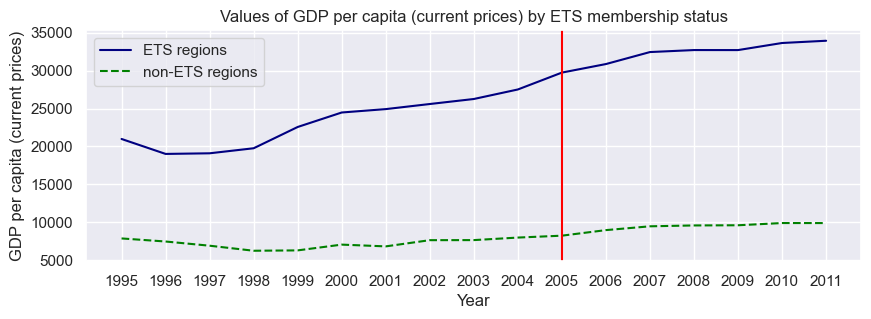

In [54]:
plt.figure(figsize=(10, 3))

plt.plot(df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 1)]['year'],
         df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 1)]['mean'],
         color = "navy", linestyle = '-', label = "ETS regions")

plt.plot(df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 0)]['year'],
         df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 0)]['mean'],
         color = "green", linestyle = '--', label = "non-ETS regions")

plt.axvline(x=2005, ymin=0, ymax=100, color='red')
plt.legend()
plt.xlabel("Year")
plt.ylabel(exp_feature_3_name)
plt.title(f"Values of {exp_feature_3_name} by ETS membership status")
plt.xticks(df["year"].unique())

plt.show()

**Notes:** This graph above shows the dynamics of mean values of GDP per capita for countries with ETS status (blue line) and those that are not included in ETS programm (green line). The vertical red line separates the timeline in pre- and post- ETS periods. 

1. **ETS regions**: the values of mean GDP per capita changed a lot throughout our time period. It increased even after the world economic crisis in 1998 and was stable in 2008 (another economic crisis). Overall, we would say that the slopes of these two "sublines" (before and after ETS) are different: in the post-ETS period it seems less steep as it was before.
2. **non-ETS regions**: before ETS the mean values of GDP per capita was quite stable (the values for 1995 and 2005 are more or less the same) but after it increase a bit.
3. We should take into account that in average EU countries are more developed in economic terms than other countries in the world (without considering USA, Australia). That's why the blue line is above the green line here.

**The Parallel Test**

In [55]:
df_before_treatment_ets = df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 1) & 
                                         (df_mean_gdp_pc['year'] < 2005)]
df_before_treatment_non_ets = df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 0) & 
                                             (df_mean_gdp_pc['year'] < 2005)]

df_after_treatment_ets = df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 1) & 
                                        (df_mean_gdp_pc['year'] >= 2005)]
df_after_treatment_non_ets = df_mean_gdp_pc[(df_mean_gdp_pc['ETS_members'] == 0) & 
                                            (df_mean_gdp_pc['year'] >= 2005)]

In [56]:
X_ets = df_before_treatment_ets[['year']]
y_ets = df_before_treatment_ets['mean']
model_ets_before = LinearRegression().fit(X_ets, y_ets)

X_non_ets = df_before_treatment_non_ets[['year']]
y_non_ets = df_before_treatment_non_ets['mean']
model_non_ets_before = LinearRegression().fit(X_non_ets, y_non_ets)

difference_in_trends_before_treatment = model_ets_before.coef_[0] - model_non_ets_before.coef_[0]

t_stat, p_value = ttest_ind(model_ets_before.predict(X_ets), model_non_ets_before.predict(X_non_ets))

print(f"coefficient of model_ets_before:     {model_ets_before.coef_[0]}")
print(f"coefficient of model_non_ets_before: {model_non_ets_before.coef_[0]}")
print(f"difference in slopes:                {difference_in_trends_before_treatment}")
print()
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

coefficient of model_ets_before:     966.1462959100808
coefficient of model_non_ets_before: 51.32792939140237
difference in slopes:                914.8183665186784

t-statistic: 17.092385455858697
p-value: 1.423115589281912e-12


**Notes: BEFORE ETS IMPLEMENTATION**

1. Before ETS implementation, ETS-countries had higher rate of GDP per capita increasment. However, since the difference between slopes is positive we might say that both trends were parallel.
2. P-value is statistically significant.

In [57]:
X_ets = df_after_treatment_ets[['year']]
y_ets = df_after_treatment_ets['mean']
model_ets_after = LinearRegression().fit(X_ets, y_ets)

X_non_ets = df_after_treatment_non_ets[['year']]
y_non_ets = df_after_treatment_non_ets['mean']
model_non_ets_after = LinearRegression().fit(X_non_ets, y_non_ets)

difference_in_trends_after_treatment = model_ets_after.coef_[0] - model_non_ets_after.coef_[0]

t_stat, p_value = ttest_ind(model_ets_after.predict(X_ets), model_non_ets_after.predict(X_non_ets))

print(f"coefficient of model_ets:     {model_ets_after.coef_[0]}")
print(f"coefficient of model_non_ets: {model_non_ets_after.coef_[0]}")
print(f"difference in slopes:         {difference_in_trends_after_treatment}")
print()
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

coefficient of model_ets:     657.844357142857
coefficient of model_non_ets: 249.64396550992092
difference in slopes:         408.2003916329361

t-statistic: 39.90302529432422
p-value: 3.964256651389072e-14


**Notes: AFTER ETS IMPLEMENTATION**

1. The slope of ETS-countries decresed, meaning that after implementatin of ETS people have lost some of the speed of getting richer. On the other hand we can see that non-ETS countries had higher pace of bacoming richer than it was before 2005.
2. This p-value is still statistically significant. However, this value is higher than the previous one, meaning that it is a bit less significant than before.

These were all codes regarding the diff-in-diff approach in our causality analysis.
To go back to the article click on one of the following links:

[Content](#content)

[Introduction](#introduction)

[Data Exploration](#data_exploration)

[Causality Analysis](#causal_analysis)

[Discussion](#discussion)

[Summary](#Summary)